<h1> 1η Υποχρεωτική Εργασία </h1>
<h2> Περιγραφή: </h2>
<h4> Να γραφεί πρόγραμμα σε οποιαδήποτε γλώσσα προγραμματισμού το οποίο να υλοποιεί ένα νευρωνικό δίκτυο πολυστρωματικού perceptron  (το δίκτυο μπορεί να είναι πλήρως συνδεδεμένο ή
συνελικτικό ή συνδυασμός) που θα εκπαιδεύεται με τον αλγόριθμο back-propagation. Το ΝΝ αυτό θα
εκπαιδευτεί για να διαχωρίζει τα δεκαδικά ψηφία (0,1,...,9) ή εικόνες ή κείμενα ή να επιλύει
οποιοδήποτε πρόβλημα κατηγοριοποίησης πολλών κλάσεων. </h4>
<h4>Το θέμα που επιλέχθηκε είναι: MNIST Digit Classification</h4>

<h3> Imports </h3>
<p> Σε αυτό το cell έχουμε όλα τα imports που θα χρειαστούμε στο notebook.</p>

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
import time

#in order to reproduce the same results every time
tf.random.set_seed(7)
RANDOM_STATE = 42

<h3>Φορτώνουμε το σύνολο δεδομένων μέσα από το Keras.</h3>
<p>Το Training set αποτελείται 60k εικόνες και το Test set αποτελείται από 10k εικόνες.</p>
<p>Κάθε εικόνα έχει διστάσεις 28x28 pixels σε Grayscale (δηλαδή έχουμε 1 channel, σε αντίθεση με το rgb που έχει 3 channels) και το label κάθε εικόνας είναι ο αριθμός που αυτή αναπαριστά (δηλαδή το label είναι ένας ακέραιος από το 0 έως το 9).</p>
<p>Κάθε pixel παίρνει τιμή από 0 έως 255, 0 για τα άσπρα pixels και 255 για τα μαύρα pixels</p>


In [149]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
print("Labels: " + str(np.unique(Y_train))) #μοναδικές τιμές του Y_train (προφανώς έχουμε τις ίδιες μοναδικές τιμές και στο Y_test)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


<h3>Τυπώνουμε την 1η και την τελευταία εικόνα του Training Set μαζί με τα αντίστοιχα labels</h3>

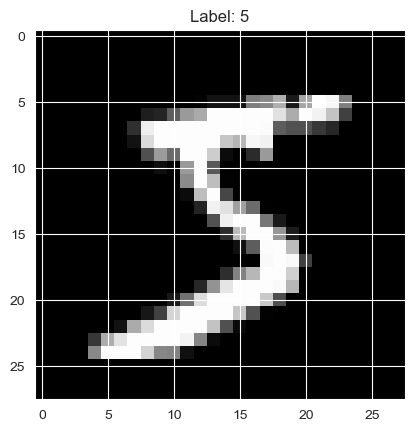

In [37]:
plt.imshow(X_train[0], cmap='gray', vmin=0, vmax=255)
plt.title(f"Label: {Y_train[0]}")
plt.show()

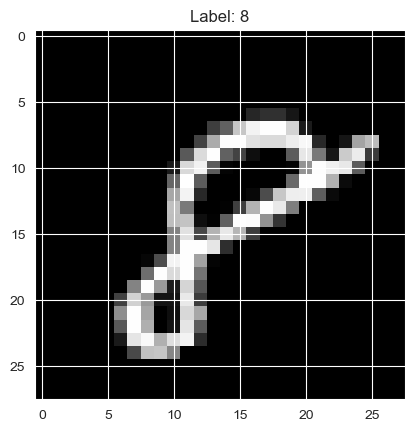

In [38]:
plt.imshow(X_train[-1], cmap='gray', vmin=0, vmax=255)
plt.title(f"Label: {Y_train[-1]}")
plt.show()

<h3>Class Imbalance Check</h3>
<h4>Έλεγχος εάν κάθε μία κλάση έχει περίπου τον ίδιο αριθμό από training examples</h4>

Text(0.5, 1.0, 'Πλήθος παραδειγμάτων ανά κλάση')

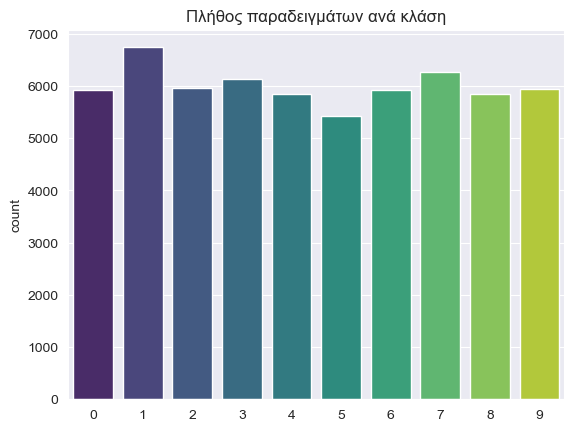

In [39]:
sns.countplot(x = Y_train, palette = "viridis")
plt.title("Πλήθος παραδειγμάτων ανά κλάση")

<h4>Παρατηρούμε ότι δεν υπάρχει class imbalance, καθώς έχουμε ισότιμη κατανομή (distribution) των training examples σε κάθε κλάση.</h4>

<h3>Προετοιμασία των Data για να τα δώσουμε στη συνέχεια στα μοντέλα.</h3>

<h4>Κάθε training example είναι στη μορφή ενός δισδιάστατου πίνακα διαστάσεων 28x28. Επειδή δεν μπορούμε να τροφοδοτήσουμε τα δεδομένα στα μοντέλα μας με αυτήν τη δισδιάστατη μορφή, μετασχηματίζουμε κάθε training example ώστε να έχει τη μορφή ενός διανύσματος(one dimension array). </h4>

In [150]:
# Flattening
X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1, 28*28))
print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_test.shape))

X_train: (60000, 784)
X_test: (10000, 784)


<h3>K-Nearest Neighbors Classifier</h3>
<h4>Με 1 πλησιέστερο γείτονα (Κ=1)</h4>

In [41]:
knn_1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
#fit
start_time = time.time()
knn_1.fit(X_train,Y_train)
end_time = time.time()
total_time_fit = end_time - start_time

#predict
start_time = time.time()
knn_1_predictions = knn_1.predict(X_test)
end_time = time.time()
total_time_predict = end_time - start_time

In [43]:
print(f"Χρόνος εκπαίδευσης: {total_time_fit} seconds.")
print(f"Χρόνος για predictions: {total_time_predict} seconds.")

Χρόνος εκπαίδευσης: 18.69765329360962 seconds.
Χρόνος για predictions: 86.24383807182312 seconds.


<h4>Παρατηρούμε ότι ο χρόνος εκπαίδευσης είναι συγκριτικά μικρότερος σε σχέση με τον χρόνο που απαιτείται για να κάνει το μοντέλο τις προβλέψεις. Κατά την εκπαίδευση ο ΚΝΝ δημιουργεί ένα Tree(π.χ. kd-trees) το οποίο θα βοηθήσει το μοντέλο να βρίσκει τους κοντινότερους γείτονες και δε γίνεται ουσιαστικά κάποια εκπαίδευση. Κατά το prediction πρέπει να βρεθούν οι πλησιέστεροι γείτονες του εκάστοτε test example που εξετάζεται και στη συνέχεια με βάση τους κοντινότερους γείτονες του να ταξινομηθεί και αυτό το training example, το οποίο έχει μεγαλύτερη υπολογιστική πολυπλοκότητα σε σχέση με το training phase και για αυτό τον λόγο βλέπουμε αυτήν τη διαφορά στους δύο χρόνους (χρόνος εκπαίδευσης και χρόνος για predictions).</h4>

<h4>Confusion Matrix</h4>

Text(0.5, 1.0, 'Confusion Matrix')

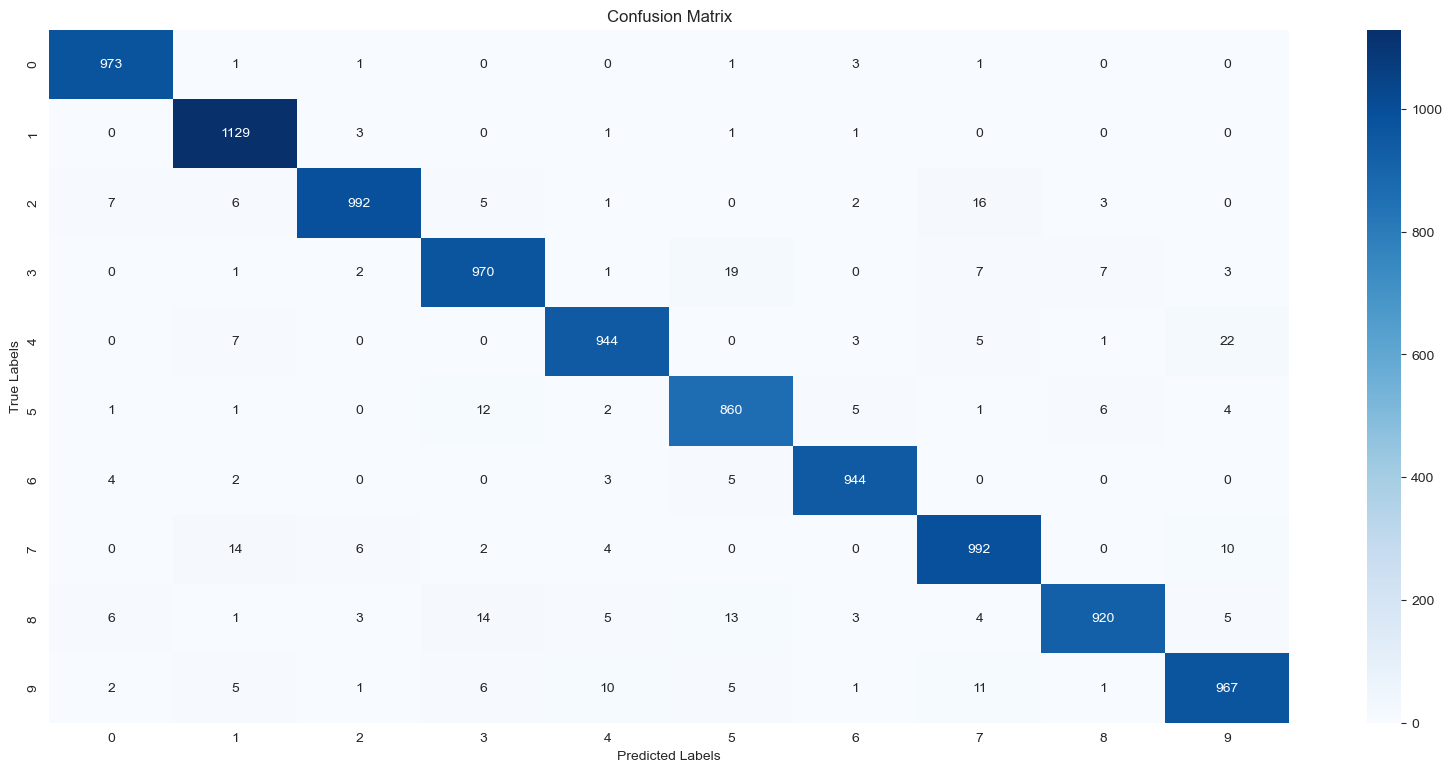

In [44]:
conf_matrix = confusion_matrix(Y_test, knn_1_predictions)
plt.figure(figsize=(20,9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

In [45]:
print("KNN with 1 nearest neighbor:")
# Accuracy (Ορθότητα)
print("Accuracy: " + str(accuracy_score(Y_test,knn_1_predictions)))
# Στις παρακάτω τρεις μετρικές χρησιμοποιήθηκε το macro στην επιλογή του average. Υπολογίζει την κάθε μετρική(Precision, Recall & F1) ανά κλάση και στην συνέχεια παίρνει ένα Μέσο Όρο που δείχνει πως τα πήγε συνολικά το μοντέλο. Αυτή η επιλογή του macro δίνει ίση βαρύτητα σε όλες τις κλάσεις, καθιστώντας το μια καλή επιλογή για balanced classification tasks -όπως είναι και η περίπτωση που εξετάζουμε.
print("F1-Score: " + str(f1_score(Y_test,knn_1_predictions,average='macro'))) # Το F1 είναι ο αρμονικός μέσος του Precision και του Recall
print("Precision: " + str(precision_score(Y_test,knn_1_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,knn_1_predictions,average='macro')))
# Logarithmic Loss: Όσο περισσότερο η προβλεπόμενη πιθανότητα αποκλίνει από την πραγματική τιμή της πιθανότητας, τόσο μεγαλύτερη είναι η τιμή του log-loss.
print("Log Loss: " + str(log_loss(Y_test,knn_1.predict_proba(X_test)))) #τιμωρεί εκθετικά το σφάλμα (Δεν λαμβάνει υπόψη το τι γίνεται στις άλλες κλάσεις)

KNN with 1 nearest neighbor:
Accuracy: 0.9691
F1-Score: 0.9688900782296754
Precision: 0.9691476332561566
Recall: 0.9687936087733112
Log Loss: 1.067248190602749


<h3>K-Nearest Neighbors Classifier</h3>
<h4>Με 3 πλησιέστερους γείτονες (Κ=3)</h4>

In [46]:
knn_3 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
#fit
start_time = time.time()
knn_3.fit(X_train,Y_train)
end_time = time.time()
total_time_fit = end_time - start_time

#predict
start_time = time.time()
knn_3_predictions = knn_3.predict(X_test)
end_time = time.time()
total_time_predict = end_time - start_time

In [47]:
print(f"Χρόνος εκπαίδευσης: {total_time_fit} seconds.")
print(f"Χρόνος για predictions: {total_time_predict} seconds.")

Χρόνος εκπαίδευσης: 19.118274450302124 seconds.
Χρόνος για predictions: 83.22268748283386 seconds.


<h4>Για τους χρόνους ισχύουν οι παρατηρήσεις που αναφέρθηκαν παραπάνω για τον ΚΝΝ με Κ=1.</h4>

<h4>Confusion Matrix</h4>

Text(0.5, 1.0, 'Confusion Matrix')

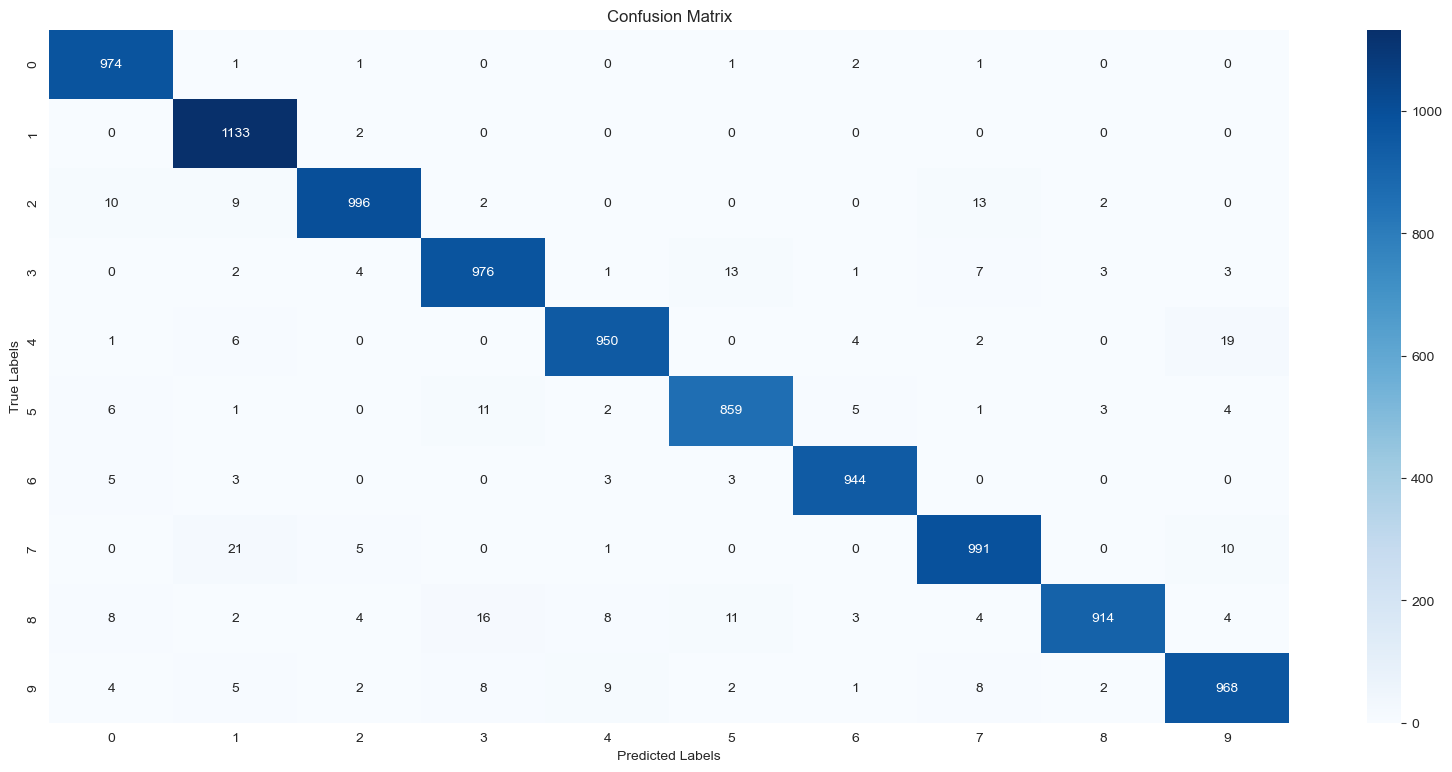

In [48]:
conf_matrix = confusion_matrix(Y_test, knn_3_predictions)
plt.figure(figsize=(20,9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

In [49]:
print("KNN with 3 nearest neighbors:")
print("Accuracy: " + str(accuracy_score(Y_test,knn_3_predictions)))
print("F1-Score: " + str(f1_score(Y_test,knn_3_predictions,average='macro')))
print("Precision: " + str(precision_score(Y_test,knn_3_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,knn_3_predictions,average='macro')))
print("Log Loss: " + str(log_loss(Y_test,knn_3.predict_proba(X_test))))

KNN with 3 nearest neighbors:
Accuracy: 0.9705
F1-Score: 0.9703749561556656
Precision: 0.9709116052270813
Recall: 0.9701144344783679
Log Loss: 0.46870144671620473


<h3>Nearest Class Centroid Classifier</h3>

In [50]:
ncc = NearestCentroid()
#fit
start_time = time.time()
ncc.fit(X_train,Y_train)
end_time = time.time()
total_time_fit = end_time - start_time

#predict
start_time = time.time()
ncc_predictions = ncc.predict(X_test)
end_time = time.time()
total_time_predict = end_time - start_time

In [51]:
print(f"Χρόνος εκπαίδευσης: {total_time_fit} seconds.")
print(f"Χρόνος για predictions: {total_time_predict} seconds.")

Χρόνος εκπαίδευσης: 0.045295000076293945 seconds.
Χρόνος για predictions: 0.019999980926513672 seconds.


<h4>Στην περίπτωση του Nearest Class Centroid παρατηρούμε ότι και οι δύο αυτοί χρόνοι είναι πολύ χαμηλοί και μάλιστα πολύ πιο χαμηλοί σε σχέση με τους αντίστοιχους χρόνους που παρατηρήσαμε στις 2 περιπτώσεις του ΚΝΝ(με Κ=1 και Κ=3). Το γεγονός αυτό είναι λογικό αφού κατά το training phase απλώς υπολογίζεται το κέντρο (centroid) της κάθε κλάσης, ενώ κατά το prediction phase δοσμένου ενός test example, υπολογίζεται η απόσταση του από όλα τα κέντρα (και όχι από όλα τα training examples όπως συμβαίνει στον KNN) και επιλέγεται η μικρότερη από αυτές τις αποστάσεις. Τελικά, το test example ταξινομείται στην κλάση στην οποία ανήκει το κέντρο με τη μικρότερη απόσταση από αυτό. Γίνεται αντιληπτό λοιπόν, πως στην περίπτωση του Nearest Class Centroid η υπολογιστική πολυπλοκότητα είναι πολύ μικρότερη σε σχέση με τον KNN. </h4>

<h4>Confusion Matrix</h4>

Text(0.5, 1.0, 'Confusion Matrix')

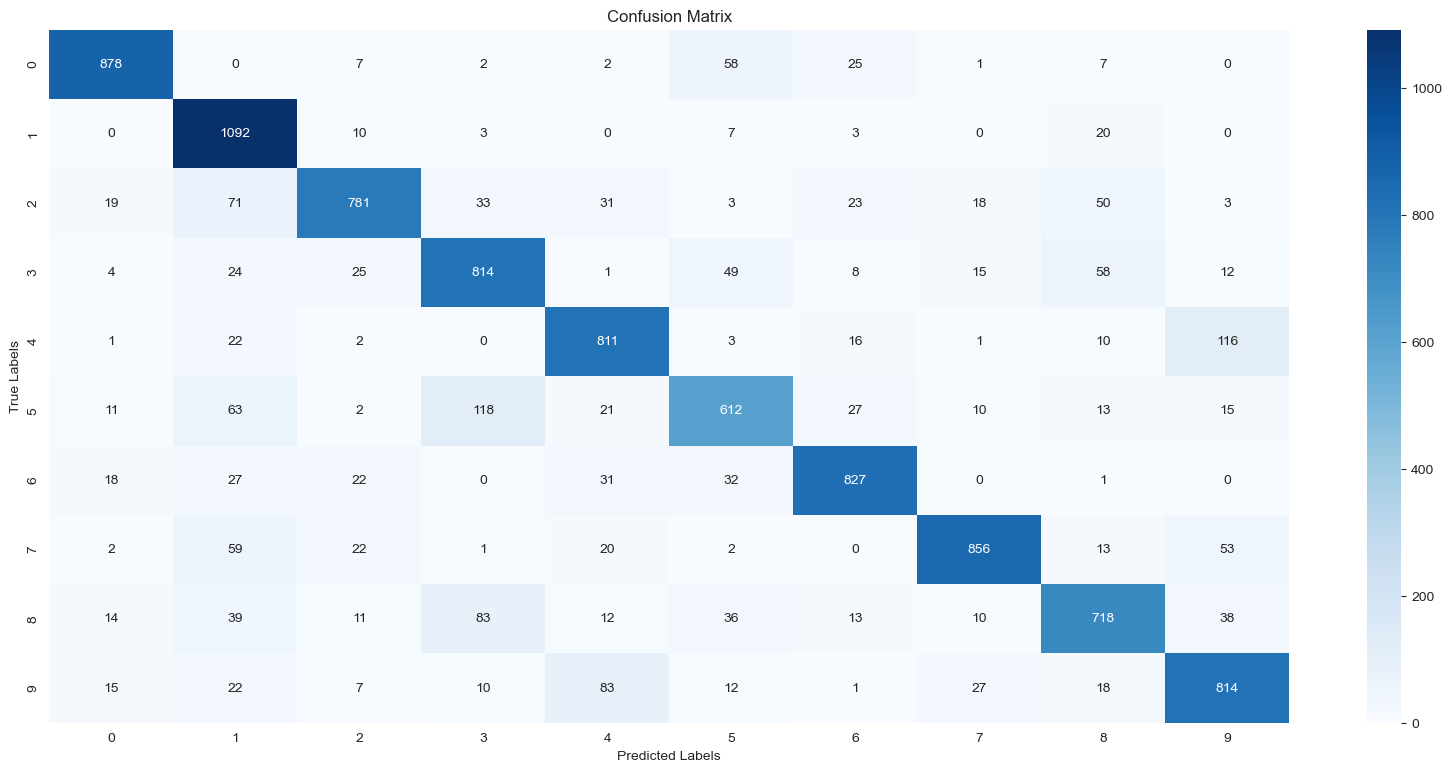

In [53]:
conf_matrix = confusion_matrix(Y_test, ncc_predictions)
plt.figure(figsize=(20,9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

In [54]:
print("Nearest Class Centroid:")
print("Accuracy: " + str(accuracy_score(Y_test,ncc_predictions)))
print("F1-Score: " + str(f1_score(Y_test,ncc_predictions,average='macro')))
print("Precision: " + str(precision_score(Y_test,ncc_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,ncc_predictions,average='macro')))
# Nearest Class Centroid does not support log loss...

Nearest Class Centroid:
Accuracy: 0.8203
F1-Score: 0.818251589052837
Precision: 0.8233834535563519
Recall: 0.8172567959938041


<h2>Συμπερασματικά, ο ΚΝΝ με Κ=3 παρατηρούμε ότι έχει καλύτερη απόδοση σε σχέση με τα άλλα δύο μοντέλα, χρονικά βέβαια χρειάζεται περίπου τον ίδιο χρόνο σε σχέση με τον ΚΝΝ με Κ=1 αλλά αρκετά παραπάνω χρόνο σε σχέση με τον Nearest Class Centroid.</h2>

<h1> Νευρωνικό δίκτυο πολυστρωματικού perceptron (MLP) </h1>
<h3> Λογισμικό που χρησιμοποιήθηκε: </h3>
<ul>
    <li> <b>scikit-learn</b> (Το Scikit-learn είναι μια δωρεάν βιβλιοθήκη μηχανικής εκμάθησης λογισμικού για τη γλώσσα προγραμματισμού Python) </li>
</ul>

<h2>Το νευρωνικό δίκτυο πολυστρωματικού perceptron (MLP) που εκπαιδεύεται με βάση τον αλγόριθμο back-propagation και επιλύει το πρόβλημα της ταξινόμησης χειρόγραφων ψηφίων, έχει τις εξής υπέρ-παραμέτρους εκπαίδευσης:</h2>
<ul>
    <li>2 κρυφά επίπεδα με 100 νευρώνες το κάθε ένα</li>
    <li>ReLU ως συνάρτηση ενεργοποίησης</li>
    <li>Adam ως optimizer</li>
    <li>Παράμετρο κανονικοποίησης(l2 regularization) ίσο με 0.001 -για να μην επιτρέψουμε στα βάρη του δικτύου να πάρουν μεγάλες τιμές και άρα να υπερεκπαιδευτεί</li>
    <li>Batch size ίσο με 100</li>
    <li>Learning Rate ίσο με 0.001</li>
    <li>Πλήθος εποχών εκπαίδευσης ίσο με 200</li>
    <li>Σε κάθε εποχή εκπαίδευσης ανακατεύουμε τα δεδομένα -βοηθάει στην καλύτερη εκπαίδευση(δεν υπάρχει bias προς κάποια κλάση)</li>
    <li>Χρήση ορμής(momentum) με την υπέρ-παράμετρο να παίρνει τιμή ίση με 0.8</li>
    <li>Αν για 15 εποχές το loss δεν βελτιωθεί κατά 1e-4, τότε θεωρούμε πως ο αλγόριθμος έχει συγκλίνει</li>
</ul>

In [155]:
multilayer_perceptron = MLPClassifier(hidden_layer_sizes=(100,100),activation="relu",solver="adam",alpha=0.001,batch_size=100,learning_rate_init=0.001,max_iter=200,shuffle=True,momentum=0.8,n_iter_no_change=15,tol=1e-4,random_state=RANDOM_STATE,verbose=True)

#fit
start_time = time.time()
multilayer_perceptron.fit(X_train,Y_train)
end_time = time.time()
total_time_fit = end_time - start_time

#predict
start_time = time.time()
multilayer_perceptron_predictions = multilayer_perceptron.predict(X_test)
end_time = time.time()
total_time_predict = end_time - start_time

Iteration 1, loss = 1.81622035
Iteration 2, loss = 0.43771829
Iteration 3, loss = 0.27905525
Iteration 4, loss = 0.20984356
Iteration 5, loss = 0.20707977
Iteration 6, loss = 0.18556274
Iteration 7, loss = 0.17058313
Iteration 8, loss = 0.16221680
Iteration 9, loss = 0.15413438
Iteration 10, loss = 0.14058434
Iteration 11, loss = 0.12423738
Iteration 12, loss = 0.11306045
Iteration 13, loss = 0.09008787
Iteration 14, loss = 0.09971875
Iteration 15, loss = 0.08751695
Iteration 16, loss = 0.09506335
Iteration 17, loss = 0.06766773
Iteration 18, loss = 0.06905604
Iteration 19, loss = 0.06147692
Iteration 20, loss = 0.06593200
Iteration 21, loss = 0.06092821
Iteration 22, loss = 0.05939667
Iteration 23, loss = 0.05786895
Iteration 24, loss = 0.04735587
Iteration 25, loss = 0.05093521
Iteration 26, loss = 0.04801228
Iteration 27, loss = 0.04318910
Iteration 28, loss = 0.04626757
Iteration 29, loss = 0.03793907
Iteration 30, loss = 0.03799135
Iteration 31, loss = 0.04346478
Iteration 32, los

In [156]:
print(f"Χρόνος εκπαίδευσης: {total_time_fit} seconds.")
print(f"Χρόνος για predictions: {total_time_predict} seconds.")

Χρόνος εκπαίδευσης: 93.78716897964478 seconds.
Χρόνος για predictions: 0.06250381469726562 seconds.


<h4>Παρατηρούμε ότι ο χρόνος εκπαίδευσης είναι αρκετά πιο μεγάλος συγκριτικά με τους KNN και Nearest Centroid (τα Νευρωνικά Δίκτυα έχουν μεγαλύτερη πολυπλοκότητα στην εκπαίδευση τους), ενώ ο χρόνος που απαιτείται για το prediction είναι περίπου ίδιος με αυτόν του Nearest Centroid και πολύ πιο μικρός σε σχέση με KNN</h4>

<h4>Loss curve during training</h4>

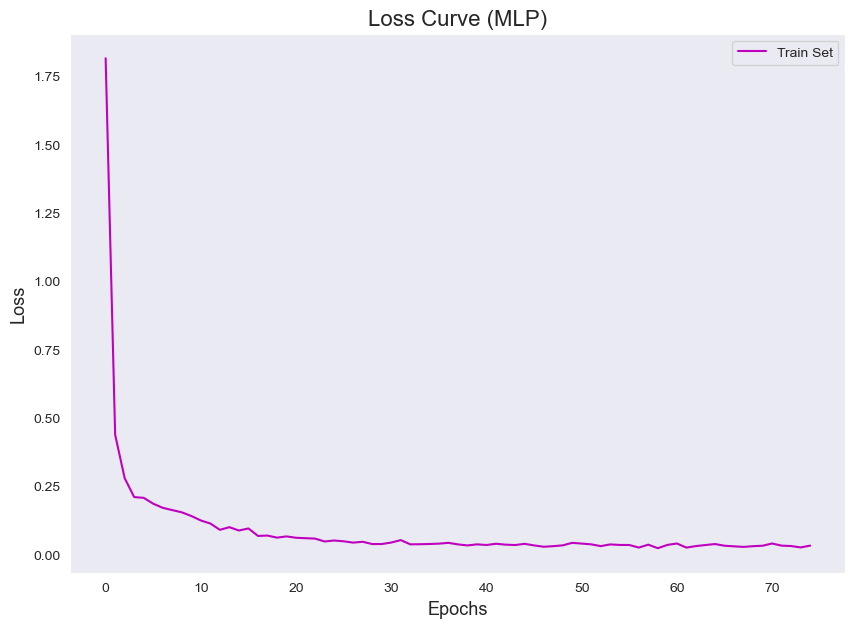

In [161]:
plt.figure(figsize=(10,7))
plt.title("Loss Curve (MLP)", fontsize='16')
plt.plot(multilayer_perceptron.loss_curve_,color='m', label="Train Set")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

Text(0.5, 1.0, 'Confusion Matrix')

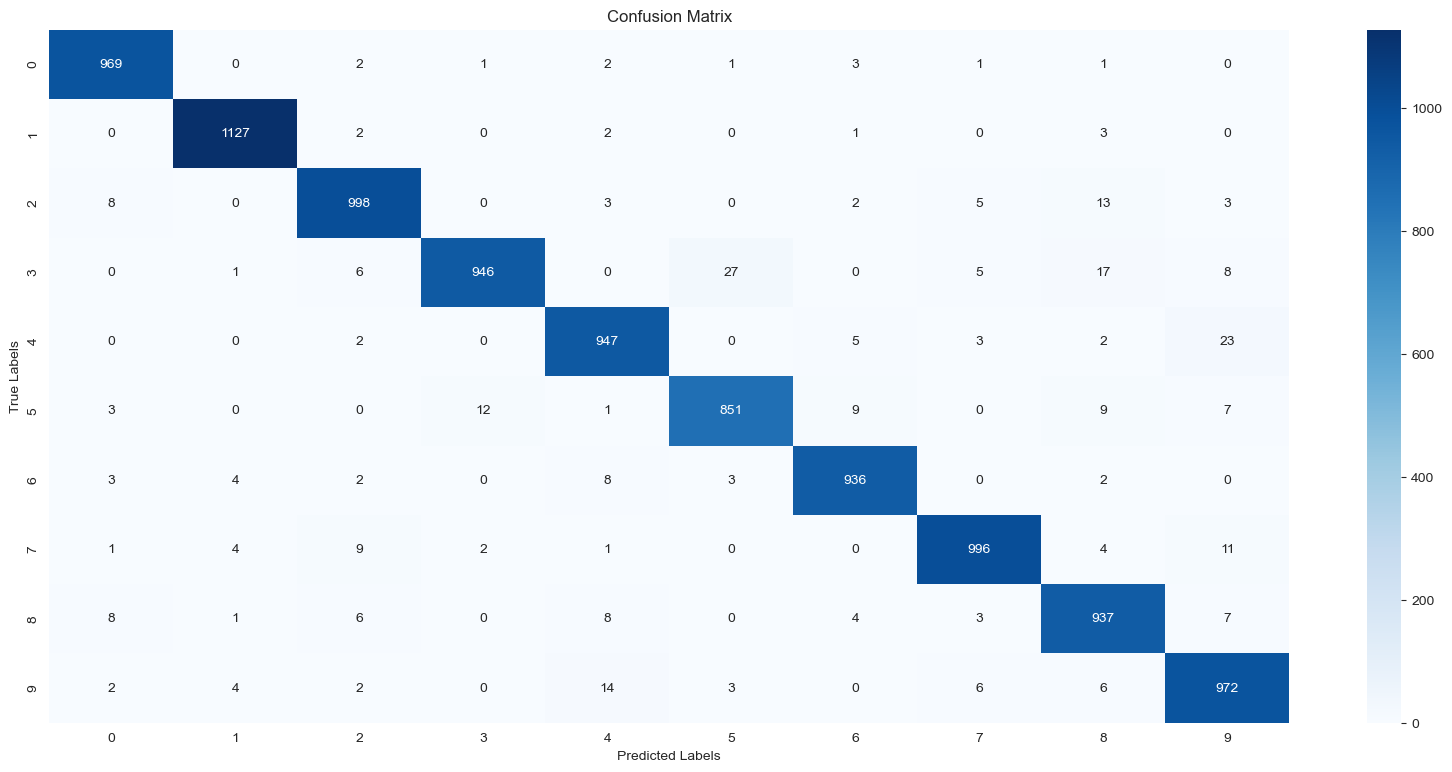

In [158]:
conf_matrix = confusion_matrix(Y_test, multilayer_perceptron_predictions)
plt.figure(figsize=(20,9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

In [165]:
multilayer_perceptron_predictions_train_set = multilayer_perceptron.predict(X_train)
print("Neural Network:")
print(f"Accuracy: {accuracy_score(Y_test,multilayer_perceptron_predictions)} (Test set), {accuracy_score(Y_train,multilayer_perceptron_predictions_train_set)} (Train Set)")
print(f"F1-Score: {f1_score(Y_test,multilayer_perceptron_predictions,average='macro')} (Test set), {f1_score(Y_train,multilayer_perceptron_predictions_train_set,average='macro')} (Train Set)")
print(f"Precision: {precision_score(Y_test,multilayer_perceptron_predictions,average='macro')}, {precision_score(Y_train,multilayer_perceptron_predictions_train_set,average='macro')} (Train Set)")
print(f"Recall: {recall_score(Y_test,multilayer_perceptron_predictions,average='macro')}, {recall_score(Y_train,multilayer_perceptron_predictions_train_set,average='macro')} (Train Set)")
print(f"Log Loss: {log_loss(Y_test,multilayer_perceptron.predict_proba(X_test))}, {log_loss(Y_train,multilayer_perceptron.predict_proba(X_train))} (Train Set)")

Neural Network:
Accuracy: 0.9679 (Test set), 0.9919666666666667 (Train Set)
F1-Score: 0.9674995025285795 (Test set), 0.9918702871288498 (Train Set)
Precision: 0.9676731040390649, 0.9918957984593421 (Train Set)
Recall: 0.9675058741561602, 0.9919409928705358 (Train Set)
Log Loss: 0.3113452087810113, 0.03500738144096483 (Train Set)


<h4>Παρατηρούμε ότι το Νευρωνικό Δίκτυο ξεπερνάει σε απόδοση την κατηγοριοποίηση Nearest Class Centroid, αλλά συγκριτικά με την κατηγοριοποίηση πλησιέστερου γείτονα (Nearest Neighbor) πετυχαίνει περίπου τα ίδια αποτελέσματα -ο ΚΝΝ με Κ=3 είναι μάλιστα και ελάχιστα καλύτερος από το MLP. Αυτό συμβαίνει επειδή το Data Set της MNIST είναι ένα εύκολο σύνολο δεδομένων και επομένως ακόμα και απλοί κατηγοριοποιητές όπως ο ΚΝΝ μπορούν να πετυχαίνουν πολύ καλά αποτελέσματα. Σε άλλα πιο δύσκολα Data Set, π.χ. Cifar-10, αναδεικνύονται οι αδυναμίες αυτών των απλών κατηγοριοποιητών. Βέβαια, πιο κάτω στο notebook θα δούμε ότι με κάποιες παραμετροποιήσεις τα Νευρωνικά Δίκτυα στο πρόβλημα της MNIST μπορούν να πετύχουν ακόμα καλύτερα αποτελέσματα σε σχέση με τον ΚΝΝ.</h4>

<h3>Παράδειγμα Εσφαλμένης κατηγοριοποίησης</h3>

In [178]:
#Κάνουμε ένα μικρό pre-process για να μπορέσουμε να εντοπίσουμε πιο εύκολα παραδείγματα εσφαλμένης κατηγοριοποίησης

# Ενώνουμε τα X_test και Y_test
Y_test_expanded = np.expand_dims(Y_test,axis=1)
Test_set = np.hstack((X_test,Y_test_expanded))
# Μαζεύουμε όλα τα παραδείγματα της κάθε κλάσης μαζί (Δηλαδή στην αρχή του Data Set έχουμε όλα τα training examples με label ίσο με 0, στη συνέχεια όλα τα training examples με label ίσο με 1, κ.ο.κ)
Sorted_test_set = Test_set[Test_set[:, 784].argsort()]
# Κάνουμε split τα X_train και Y_train
Y_test_sorted = Sorted_test_set[:, -1] # for last column
X_test_sorted = Sorted_test_set[:, :-1] # for all but last column

# predictions
mlp_predictions_sorted = multilayer_perceptron.predict(X_test_sorted)

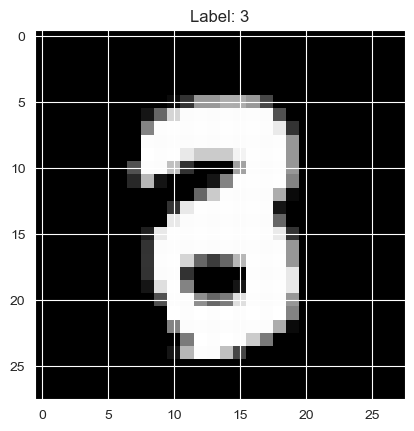

Prediction: 8
Correct Label: 3


In [198]:
plt.imshow(np.reshape(X_test_sorted[3686],(28,28)), cmap='gray', vmin=0, vmax=255)
plt.title(f"Label: {Y_test_sorted[3686]}")
plt.show()
print(f"Prediction: {mlp_predictions_sorted[3686]}")
print(f"Correct Label: {Y_test_sorted[3686]}")

<h3>Παρατηρούμε ότι το μοντέλο πρόβλεψε ότι το ψηφίο αυτό είναι ένα 8, αλλά το label που έχει κανονικά είναι το 3. Βέβαια, σε αυτήν την περίπτωση βλέπουμε στην εικόνα πως αυτό το ψηφίο μοιάζει πιο πολύ με 8 παρά με 3 (ακόμα και σε εμάς τους ανθρώπους). Άρα θα λέγαμε ότι "καλώς" έκανε και το μπέρδεψε αυτό το ψηφίο το μοντέλο μας.</h3>

<h3>Παράδειγμα Ορθής κατηγοριοποίησης</h3>

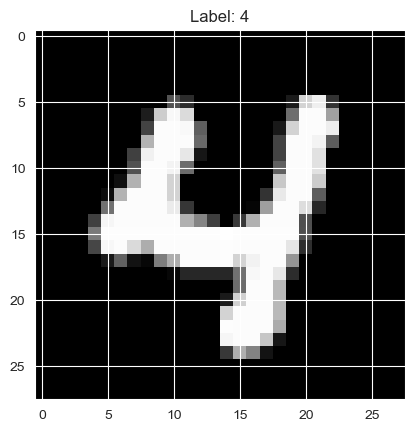

Prediction: 4
Correct Label: 4


In [199]:
plt.imshow(np.reshape(X_test_sorted[5000],(28,28)), cmap='gray', vmin=0, vmax=255)
plt.title(f"Label: {Y_test_sorted[5000]}")
plt.show()
print(f"Prediction: {mlp_predictions_sorted[5000]}")
print(f"Correct Label: {Y_test_sorted[5000]}")

<h4>Παρατηρούμε στην εικόνα ότι πρόκειται για ένα "καλοσχεδιασμένο" 4 και συνεπώς το μοντέλο δε δυσκολεύεται στο να προβλέψει ορθά το ψηφίο</h4>

<h1>Πειραματισμοί που σχετίζονται με το κομμάτι του learning, όπως αυτό περιγράφηκε και αναλύθηκε στις διαλέξεις του μαθήματος.</h1>
<h3>Πιο συγκεκριμένα, θα αναλυθούν τα εξής:</h3>
<ol>
    <li>Αρχικοποίηση των βαρών του Νευρωνικού Δικτύου (Weight Initialization)</li>
    <li>Μέθοδοι pre-processing(Standardization-Normalization)</li>
    <li>One Hot Encoding</li>
    <li>Batch,Mini-Batch,Stochastic Gradient Descent</li>
    <li>Shuffle των Data στην αρχή κάθε εποχής</li>
    <li>Cross Validation for hyper-parameter tuning</li>
    <li>Committees of Neural Networks</li>
</ol>


<h2>Αρχικοποίηση των βαρών του Νευρωνικού Δικτύου (Weight Initialization)</h2>
<h3> Η αρχικοποίηση των βαρών έχει σημαντικό αντίκτυπο στη σύγκλιση(convergence) των αλγορίθμων που χρησιμοποιούνται στην εκπαίδευση βαθιών νευρωνικών δικτύων. </h3>
<h4> Στο συγκεκριμένο πείραμα θα εξετάσουμε τη σημαντικότητα αυτή, παρουσιάζοντας τρεις περιπτώσεις:
<ol>
    <li>Αρχικοποίηση των βαρών με πάρα πολύ <b>μεγάλες</b> αρχικές τιμές (exploding gradients problem)</li>
    <li>Αρχικοποίηση των βαρών με πάρα πολύ <b>μικρές</b> αρχικές τιμές (vanishing gradients problem)</li>
        <ol>
        <li>Εξετάζοντας λίγο περισσότερο το φαινόμενο Vanishing Gradients</li>
        <li>The Dying ReLU Problem</li>
        </ol>
    <li>Αρχικοποίηση των βαρών με <b>κατάλληλες(appropriate)</b> αρχικές τιμές</li>
</ol>
<br>
<cite><a href="https://www.deeplearning.ai/ai-notes/initialization/index.html">Πηγή Αναφοράς</a></cite>

<h2>Περίπτωση 1: A too-large initialization leads to exploding gradients problem</h2>
<h3>Γιατί συμβαίνει αυτό;</h3>
<h3>Εάν αρχικοποιήσουμε τα βάρη με πάρα πολύ <b>μεγάλες</b> αρχικές τιμές, τα gradients του κόστους ως προς τις παραμέτρους παίρνουν πολύ μεγάλες τιμές (αυτό συμβαίνει γιατί τα βάρη του νευρωνικού δικτύου εμπλέκονται στον υπολογισμό του `Δw(n) = lr * δ(n) * y(n)` ). Σε αυτήν την περίπτωση έχουμε πολύ μεγάλα (θηριώδη) weight updates και άρα αυτό έχει ως αποτέλεσμα το κόστος να ταλαντεύεται γύρω από την ελάχιστη τιμή του και συνεπώς να δυσκολεύεται να συγκλίνει ο αλγόριθμος εκπαίδευσης.</h3>

In [5]:
# Αρχικοποίηση των weights and biases με πολύ μεγάλες αρχικές τιμές.
class MLPClassifierHugeInitialWeights(MLPClassifier):
    # Overriding _init_coef method
    def _init_coef(self, fan_in, fan_out):
        if self.activation == 'logistic':
            init_bound = np.sqrt(2. / (fan_in + fan_out))
        elif self.activation in ('identity', 'tanh', 'relu'):
            init_bound = np.sqrt(6. / (fan_in + fan_out))
        else:
            raise ValueError("Unknown activation function %s" %
                             self.activation)
        coef_init = self._random_state.uniform(-init_bound, init_bound,(fan_in, fan_out))*1000 #Αρχικοποίηση των βαρών με πολύ μεγάλες αρχικές τιμές

        intercept_init =  self._random_state.uniform(-init_bound, init_bound,fan_out)*1000 #Αρχικοποίηση των biases με πολύ μεγάλες αρχικές τιμές

        return coef_init, intercept_init

In [6]:
exploding_gradients = MLPClassifierHugeInitialWeights(hidden_layer_sizes=(5,5,5),activation="relu", solver="sgd",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
exploding_gradients.fit(X_train,Y_train)

Iteration 1, loss = 32.54021028
Iteration 2, loss = 32.52879646
Iteration 3, loss = 32.35422013
Iteration 4, loss = 30.01559388
Iteration 5, loss = 29.95240714
Iteration 6, loss = 29.91825116
Iteration 7, loss = 29.88413817
Iteration 8, loss = 29.84994798
Iteration 9, loss = 29.81558317
Iteration 10, loss = 29.78137453
Iteration 11, loss = 29.74747996
Iteration 12, loss = 29.71326255
Iteration 13, loss = 29.67908503
Iteration 14, loss = 29.64484197
Iteration 15, loss = 29.61053091
Iteration 16, loss = 29.57654836
Iteration 17, loss = 29.54233330
Iteration 18, loss = 29.50798186
Iteration 19, loss = 29.47392522
Iteration 20, loss = 29.43995342
Iteration 21, loss = 29.40578069
Iteration 22, loss = 29.37145954
Iteration 23, loss = 29.33745207
Iteration 24, loss = 29.30325913
Iteration 25, loss = 29.26923826
Iteration 26, loss = 29.23513486
Iteration 27, loss = 29.20101565
Iteration 28, loss = 29.16712957
Iteration 29, loss = 29.13316168
Iteration 30, loss = 29.09920755
Iteration 31, loss 

MLPClassifierHugeInitialWeights(alpha=0.0, hidden_layer_sizes=(5, 5, 5),
                                momentum=0, n_iter_no_change=50,
                                random_state=42, solver='sgd', verbose=True)

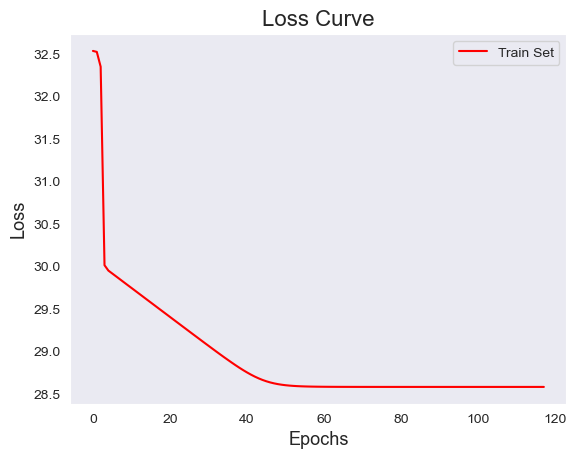

In [7]:
plt.title("Loss Curve (Exploding Gradients)", fontsize='16')
plt.plot(exploding_gradients.loss_curve_,color='r', label="Train Set")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

In [8]:
mean_of_weights = np.sum(np.mean(exploding_gradients.coefs_[0]) + np.mean(exploding_gradients.coefs_[1]) + np.mean(exploding_gradients.coefs_[2]) + np.mean(exploding_gradients.coefs_[3])) / (exploding_gradients.n_layers_ - 1)
print(f"Ο μέσος όρος των τιμών των βαρών σε όλο το νευρωνικό δίκτυο: {mean_of_weights}")

Ο μέσος όρος των τιμών των βαρών σε όλο το νευρωνικό δίκτυο: -1621647.445987707


<h3>Παρατηρήσεις:</h3>
<ul>
    <li>Το loss είναι πολύ μεγάλο, περίπου στο 28 (ενώ ιδανικά θα θέλαμε μια τιμή κοντά στο 0)</li>
    <li>Το loss για 50 συνεχόμενες εποχές δεν έχει καμία βελτίωση, γεγονός που μας δείχνει ότι το νευρωνικό δίκτυο δεν μπορεί να μάθει το task</li>
</ul>


<h2>Περίπτωση 2: A too-small initialization leads to vanishing gradients</h2>
<h3>Εάν αρχικοποιήσουμε τα βάρη με πάρα πολύ <b>μικρές</b> αρχικές τιμές, τα gradients του κόστους ως προς τις παραμέτρους παίρνουν πολύ μικρές τιμές (αυτό συμβαίνει γιατί τα βάρη του νευρωνικού δικτύου εμπλέκονται στον υπολογισμό του `Δw(n) = lr * δ(n) * y(n)` ). Σε αυτήν την περίπτωση έχουμε πολύ μικρά weight updates και άρα αυτό έχει ως αποτέλεσμα η εκπαίδευση να αργεί πάρα πολύ (slow learning) και το κόστος να συγκλίνει πριν πάρει την ελάχιστη τιμή του.</h3>

In [14]:
# Αρχικοποίηση των weights and biases με πολύ μικρές αρχικές τιμές.
class MLPClassifierSmallInitialWeights(MLPClassifier):
    # Overriding _init_coef method
    def _init_coef(self, fan_in, fan_out):
        if self.activation == 'logistic':
            init_bound = np.sqrt(2. / (fan_in + fan_out))
        elif self.activation in ('identity', 'tanh', 'relu'):
            init_bound = np.sqrt(6. / (fan_in + fan_out))
        else:
            raise ValueError("Unknown activation function %s" %
                             self.activation)
        coef_init = self._random_state.uniform(-init_bound, init_bound,(fan_in, fan_out))/10000 #Αρχικοποίηση των βαρών με πολύ μικρές αρχικές τιμές

        intercept_init =  self._random_state.uniform(-init_bound, init_bound,fan_out)/10000 #Αρχικοποίηση των biases με πολύ μικρές αρχικές τιμές

        return coef_init, intercept_init

In [15]:
vanishing_gradients = MLPClassifierSmallInitialWeights(hidden_layer_sizes=(5,5,5),activation="relu", solver="sgd",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
vanishing_gradients.fit(X_train,Y_train)

Iteration 1, loss = 2.30254490
Iteration 2, loss = 2.30246354
Iteration 3, loss = 2.30238692
Iteration 4, loss = 2.30231467
Iteration 5, loss = 2.30224654
Iteration 6, loss = 2.30218250
Iteration 7, loss = 2.30212232
Iteration 8, loss = 2.30206571
Iteration 9, loss = 2.30201219
Iteration 10, loss = 2.30196189
Iteration 11, loss = 2.30191457
Iteration 12, loss = 2.30187010
Iteration 13, loss = 2.30182827
Iteration 14, loss = 2.30178874
Iteration 15, loss = 2.30175168
Iteration 16, loss = 2.30171668
Iteration 17, loss = 2.30168385
Iteration 18, loss = 2.30165288
Iteration 19, loss = 2.30162378
Iteration 20, loss = 2.30159643
Iteration 21, loss = 2.30157056
Iteration 22, loss = 2.30154633
Iteration 23, loss = 2.30152349
Iteration 24, loss = 2.30150193
Iteration 25, loss = 2.30148183
Iteration 26, loss = 2.30146286
Iteration 27, loss = 2.30144483
Iteration 28, loss = 2.30142815
Iteration 29, loss = 2.30141245
Iteration 30, loss = 2.30139743
Iteration 31, loss = 2.30138350
Iteration 32, los

MLPClassifierSmallInitialWeights(alpha=0.0, hidden_layer_sizes=(5, 5, 5),
                                 momentum=0, n_iter_no_change=50,
                                 random_state=42, solver='sgd', verbose=True)

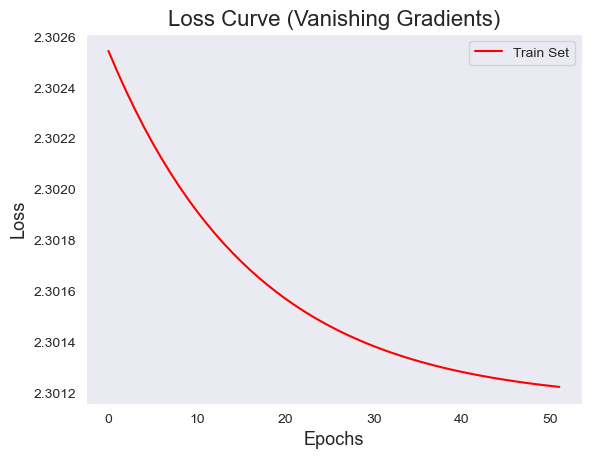

In [16]:
plt.title("Loss Curve (Vanishing Gradients)", fontsize='16')
plt.plot(vanishing_gradients.loss_curve_,color='r', label="Train Set")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h3>Παρατηρήσεις</h3>
<ul>
    <li>Το νευρωνικό δίκτυο μαθαίνει το task, καθώς βλέπουμε ότι το loss μειώνεται καθώς αυξάνονται οι εποχές.(Σε αντίθεση με την Περίπτωση 1 όπου αδυνατούσε το νευρωνικό να μάθει)</li>
    <li>Ωστόσο, βλέπουμε ότι το loss μειώνεται με μια πολύ ομαλή κλίση (slow learning), μιας και οι gradients εξασθενούν και άρα τα steps που κάνουμε προς το (local) minimum είναι πολύ μικρά.</li>
     <li>Επιπλέον, παρατηρούμε ότι το δίκτυο έχει συγκλίνει μόλις στις 52 εποχές (επιβαιώνεται έτσι το γεγονός ότι σε αυτήν την περίπτωση με πολύ μικρές τιμές βαρών και biases οδηγούμαστε σε σύγκλιση του κόστους προτού φτάσει το κόστος στην ελάχιστη τιμή του.)</li>
</ul>

<h2>Περίπτωση 2.1: Εξετάζοντας λίγο περισσότερο το φαινόμενο Vanishing Gradients (<cite><a href="https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484">Πηγή Αναφοράς</a></cite>)</h2>
<h3>Το πρόβλημα του Vanishing Gradients είναι ιδιαίτερα έντονο σε βαθιά νευρωνικά δίκτυα, όπου οι local gradients αρχικά υπολογίζονται στο output layer του δικτύου και πρέπει να γίνουν propagate πολλά layers προς τα πίσω (π.χ. 10). Σε μια τέτοια περίπτωση είναι πολύ πιθανό τα gradients να αποσβαίνουν -τείνουν προς το μηδέν- καθώς πηγαίνουν προς τα πίσω και άρα τα πρώτα layers του δικτύου να μην μπορούν να εκπαιδευτούν. Στο φαινόμενο αυτό(vanishing gradients) καθοριστικό ρόλο παίζει και η activation function που χρησιμοποιείται στο δίκτυο. Αυτό ακριβώς θα αναδείξουμε και στο επόμενο πείραμα.</h3>
<h4>Στο παρακάτω πείραμα, θα εξετάσουμε 2 γνωστές activation functions: τη ReLU και την Sigmoid</h4>

<h3>Παρακάτω βλέπουμε την Sigmoid(logistic) μαζί με την παράγωγό της</h3>


C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


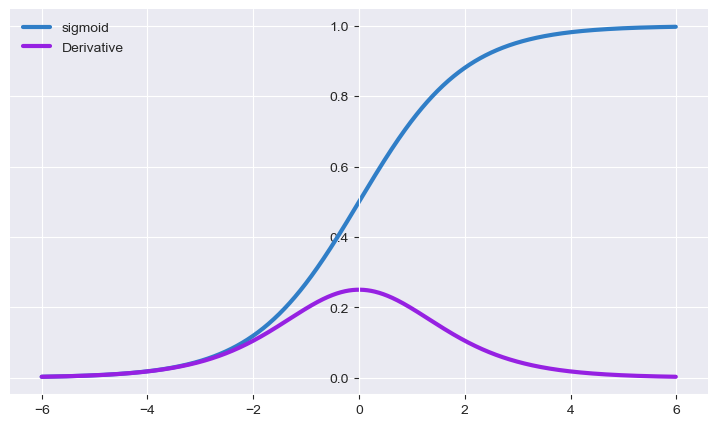

In [10]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)
    return s,ds

x = np.arange(-6,6,0.01)
sigmoid(x)
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(x,sigmoid(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="#9621E2", linewidth=3, label="Derivative")
ax.legend(loc="best", frameon=False)
fig.show()

<h3>Παρακάτω βλέπουμε την ReLU μαζί με την παράγωγό της</h3>

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


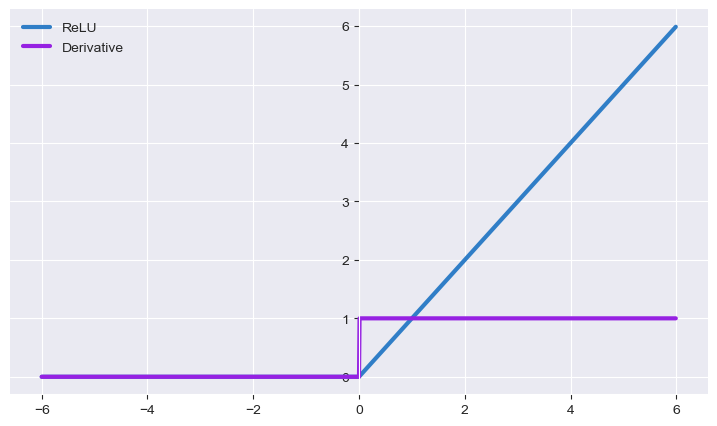

In [9]:
def relu(x):
    r = np.maximum(0, x)
    dr = (x > 0) * 1
    return r,dr

x=np.arange(-6,6,0.01)
relu(x)
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot(x,relu(x)[0], color="#307EC7", linewidth=3, label="ReLU")
ax.plot(x,relu(x)[1], color="#9621E2", linewidth=3, label="Derivative")
ax.legend(loc="best", frameon=False)
fig.show()

In [32]:
# 20 hidden layers with ReLU
relu = MLPClassifier(hidden_layer_sizes=(10,20,20,10,5,10,10,10,15,5,10,10,14,13,12,15,5,12,19,20),activation="relu", solver="sgd",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
relu.fit(X_train,Y_train)

Iteration 1, loss = 2.36048128
Iteration 2, loss = 2.33565402
Iteration 3, loss = 2.32249799
Iteration 4, loss = 2.31492809
Iteration 5, loss = 2.31032756
Iteration 6, loss = 2.30742020
Iteration 7, loss = 2.30559767
Iteration 8, loss = 2.30435762
Iteration 9, loss = 2.30347261
Iteration 10, loss = 2.30283100
Iteration 11, loss = 2.30235532
Iteration 12, loss = 2.30199288
Iteration 13, loss = 2.30170980
Iteration 14, loss = 2.30148374
Iteration 15, loss = 2.30129733
Iteration 16, loss = 2.30114013
Iteration 17, loss = 2.30100521
Iteration 18, loss = 2.30088628
Iteration 19, loss = 2.30078273
Iteration 20, loss = 2.30068658
Iteration 21, loss = 2.30059324
Iteration 22, loss = 2.30050022
Iteration 23, loss = 2.30040867
Iteration 24, loss = 2.30031111
Iteration 25, loss = 2.30020741
Iteration 26, loss = 2.30009302
Iteration 27, loss = 2.29996908
Iteration 28, loss = 2.29983410
Iteration 29, loss = 2.29968663
Iteration 30, loss = 2.29952578
Iteration 31, loss = 2.29934825
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=0.0,
              hidden_layer_sizes=(10, 20, 20, 10, 5, 10, 10, 10, 15, 5, 10, 10,
                                  14, 13, 12, 15, 5, 12, 19, 20),
              momentum=0, n_iter_no_change=50, random_state=42, solver='sgd',
              verbose=True)

In [33]:
# 20 hidden layers with Sigmoid(Logistic)
sigmoid = MLPClassifier(hidden_layer_sizes=(10,20,20,10,5,10,10,10,15,5,10,10,14,13,12,15,5,12,19,20),activation="logistic", solver="sgd",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
sigmoid.fit(X_train,Y_train)

Iteration 1, loss = 2.31729336
Iteration 2, loss = 2.31243859
Iteration 3, loss = 2.30903600
Iteration 4, loss = 2.30664641
Iteration 5, loss = 2.30497549
Iteration 6, loss = 2.30380572
Iteration 7, loss = 2.30299060
Iteration 8, loss = 2.30242695
Iteration 9, loss = 2.30203706
Iteration 10, loss = 2.30176833
Iteration 11, loss = 2.30158354
Iteration 12, loss = 2.30145440
Iteration 13, loss = 2.30136568
Iteration 14, loss = 2.30130441
Iteration 15, loss = 2.30126337
Iteration 16, loss = 2.30123444
Iteration 17, loss = 2.30121520
Iteration 18, loss = 2.30120219
Iteration 19, loss = 2.30119354
Iteration 20, loss = 2.30118706
Iteration 21, loss = 2.30118324
Iteration 22, loss = 2.30117905
Iteration 23, loss = 2.30117827
Iteration 24, loss = 2.30117655
Iteration 25, loss = 2.30117583
Iteration 26, loss = 2.30117435
Iteration 27, loss = 2.30117464
Iteration 28, loss = 2.30117390
Iteration 29, loss = 2.30117377
Iteration 30, loss = 2.30117313
Iteration 31, loss = 2.30117361
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0,
              hidden_layer_sizes=(10, 20, 20, 10, 5, 10, 10, 10, 15, 5, 10, 10,
                                  14, 13, 12, 15, 5, 12, 19, 20),
              momentum=0, n_iter_no_change=50, random_state=42, solver='sgd',
              verbose=True)

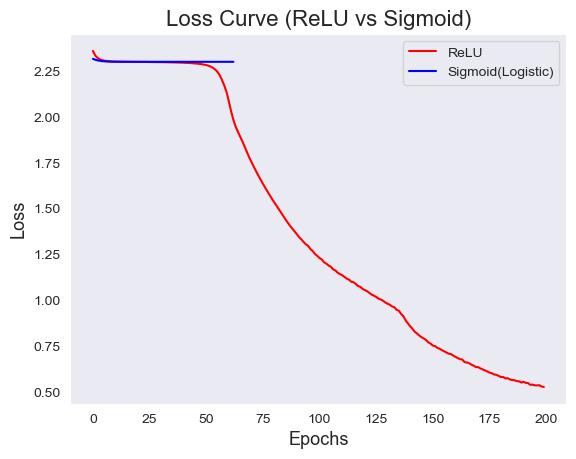

In [34]:
plt.title("Loss Curve (ReLU vs Sigmoid)", fontsize='16')
plt.plot(relu.loss_curve_,color='r', label="ReLU")
plt.plot(sigmoid.loss_curve_,color='b', label="Sigmoid(Logistic)")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h3>Παρατηρήσεις</h3>
<h4>Το νευρωνικό δίκτυο με συνάρτηση ενεργοποίησης ReLU εκπαιδεύεται (το loss μειώνεται καθώς αυξάνονται οι εποχές -εάν αφήναμε το δίκτυο να εκπαιδευτεί και άλλες εποχές θα έπεφτε ακόμα περισσότερο το loss), ενώ αντίθετα χρησιμοποιώντας τη Sigmoid(Logistic) βλέπουμε πως δεν εκπαιδεύεται (το loss για 63 εποχές εκπαίδευσης ΔΕΝ μειώθηκε σχεδόν καθόλου μιας και παρέμεινε στο 2.3 - μάλιστα το loss για 50 συνεχόμενες εποχές (τις τελευταίες 50) παρέμεινε σταθερό και άρα θεωρήσαμε ότι ο αλγόριθμος εκπαίδευσης έχει συγκλίνει και σταματήσαμε την εκπαίδευση)</h4>
<h4>Γιατί συμβαίνει αυτό;</h4>
<h4>Η παράγωγος της λογιστικής συνάρτησης παίρνει τιμές από 0 έως 0.25 και σε πολλά σημεία της τείνει προς το μηδέν (saturated areas), γεγονός που μας δείχνει ότι έχουμε μια πολύ μικρή παράγωγο. Όταν N (στο παράδειγμα μας N = 20) κρυφά επίπεδα χρησιμοποιούν μια ενεργοποίηση όπως η σιγμοειδής συνάρτηση, N μικρές παράγωγοι πολλαπλασιάζονται μαζί. Έτσι, η τοπική κλίση - local gradients (που μας δείχνει τη συμβολή που είχε κάθε νευρώνας στο λάθος) μειώνεται εκθετικά καθώς διαδίδεται το σφάλμα προς τα πίσω layers. Με άλλα λόγια, για να μπορέσει το σφάλμα από το output layer του δικτύου να φτάσει μέχρι και το πρώτο κρυφό layer πρέπει όλοι οι νευρώνες να είναι στη "γραμμική" περιοχή περίπου της sigmoid. Αν κάποιος νευρώνας είναι saturated (δηλαδή κορεσμένος είτε στα θετικά είτε στα αρνητικά) τότε η παράγωγος αυτού του νευρώνα είναι πολύ κοντά στο μηδέν και άρα δεν περνάει το σφάλμα προς τα πίσω. Μικρές τοπικές κλίσεις συνεπάγεται ότι οι νευρώνες δε διορθώνουν όπως θα έπρεπε τα συναπτικά τους βάρη και άρα το δίκτυο δεν μπορεί να μάθει. </h4>
<h4>Αντίθετα, όταν χρησιμοποιούμε ως activation function ReLU έχουμε το πλεονέκτημα ότι έχει παράγωγο 1 στα θετικά και άρα αρκεί κάποιοι νευρώνες να είναι στα θετικά προκειμένου να διαδοθεί το σφάλμα προς τα πίσω. Θεωρούμε πως περίπου οι μισοί νευρώνες είναι στα θετικά και άρα θα διαδοθεί το error signal προς τα πίσω, ακόμα και μέχρι το πρώτο κρυφό layer. </h4>

<h4>Άρα να χρησιμοποιούμε σε όλα μας τα δίκτυα ReLU; (Βλ. το επόμενο πείραμα)</h4>

<h2>Περίπτωση 2.2: The Dying ReLU Problem (<cite><a href="https://towardsdatascience.com/the-dying-relu-problem-clearly-explained-42d0c54e0d24">Πηγή Αναφοράς</a></cite>)</h2>
<h4>Η ReLU έχει κάποια σημαντικά πλεονεκτήματα όπως: 1)Οδηγεί σε network sparsity και άρα σε υψηλότερη υπολογιστική αποτελεσματικότητα, 2)Απαιτούνται απλές μαθηματικές πράξεις (η sigmoid και η tanh θεωρούνται complicated functions), 3)Δεν πάσχει από το vanishing gradient problem(Βλ. πιο πάνω)</h4>
<h4>Ωστόσο, η ReLU πάσχει από το Dying ReLU Problem το οποίο αναφέρεται στην περίπτωση όπου πολλοί υπολογιστικοί νευρώνες βγάζουν ως έξοδο μηδέν. Αυτό συμβαίνει στην περίπτωση όπου το δυναμικό του νευρώνα (δηλαδή το weighted sum εισόδου με τα βάρη + bias) βρίσκεται στην αρνητική περιοχή της συνάρτησης ReLU. Μάλιστα σε αυτήν την περίπτωση, στο backwards πέρασμα τα local gradients είναι μηδέν, οπότε δεν μπορούν να γίνουν update τα συναπτικά βάρη των νευρώνων και άρα δεν εκπαιδεύεται το δίκτυο. Το worst-case σενάριο είναι όταν ολόκληρο το νευρωνικό δίκτυο "πεθαίνει", δηλαδή το δίκτυο έχει όλους του τους νευρώνες inactive και συνεπώς μετατρέπεται σε μια constant function.</h4>
<h4>Αιτίες αυτού του φαινομένου είναι το μεγάλο learning rate και οι μεγάλες αρνητικές τιμές στα biases</h4>
<h4>Στο παρακάτω πείραμα, αρχικοποιούμε ένα νευρωνικό δίκτυο με μεγάλες αρνητικές τιμές στα biases.</h4>

In [64]:
# Αρχικοποίηση των biases με πολύ μεγάλες αρνητικές αρχικές τιμές.
class MLPClassifierLargeNegativebias(MLPClassifier):
    # Overriding _init_coef method
    def _init_coef(self, fan_in, fan_out):
        if self.activation == 'logistic':
            init_bound = np.sqrt(2. / (fan_in + fan_out))
        elif self.activation in ('identity', 'tanh', 'relu'):
            init_bound = np.sqrt(6. / (fan_in + fan_out))
        else:
            raise ValueError("Unknown activation function %s" %
                             self.activation)
        coef_init = self._random_state.uniform(-init_bound, init_bound,(fan_in, fan_out))

        intercept_init =  - np.abs(self._random_state.uniform(-init_bound, init_bound,fan_out)*10000) #Αρχικοποίηση των biases με πολύ μεγάλες αρνητικές αρχικές τιμές

        return coef_init, intercept_init

In [78]:
# 3 hidden layers with ReLU
dying_relu = MLPClassifierLargeNegativebias(hidden_layer_sizes=(10,20,20),activation="relu", solver="adam",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
dying_relu.fit(X_train,Y_train)

Iteration 1, loss = 32.53420300
Iteration 2, loss = 32.53420300
Iteration 3, loss = 32.53420300
Iteration 4, loss = 32.53420300
Iteration 5, loss = 32.53420300
Iteration 6, loss = 32.53420300
Iteration 7, loss = 32.53420300
Iteration 8, loss = 32.53420300
Iteration 9, loss = 32.53420300
Iteration 10, loss = 32.53420300
Iteration 11, loss = 32.53420300
Iteration 12, loss = 32.53420300
Iteration 13, loss = 32.53420300
Iteration 14, loss = 32.53420300
Iteration 15, loss = 32.53420300
Iteration 16, loss = 32.53420300
Iteration 17, loss = 32.53420300
Iteration 18, loss = 32.53420300
Iteration 19, loss = 32.53420300
Iteration 20, loss = 32.53420300
Iteration 21, loss = 32.53420300
Iteration 22, loss = 32.53420300
Iteration 23, loss = 32.53420300
Iteration 24, loss = 32.53420300
Iteration 25, loss = 32.53420300
Iteration 26, loss = 32.53420300
Iteration 27, loss = 32.53420300
Iteration 28, loss = 32.53420300
Iteration 29, loss = 32.53420300
Iteration 30, loss = 32.53420300
Iteration 31, loss 

MLPClassifierLargeNegativebias(alpha=0.0, hidden_layer_sizes=(10, 20, 20),
                               momentum=0, n_iter_no_change=50, random_state=42,
                               verbose=True)

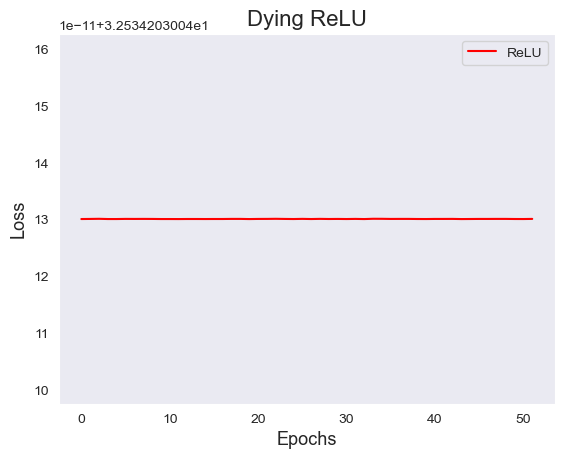

In [79]:
plt.title("Dying ReLU", fontsize='16')
plt.plot(dying_relu.loss_curve_,color='r', label="ReLU")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

Μέσος όρος και τυπική απόκλιση των προβλέψεων: 4.0 & 0.0


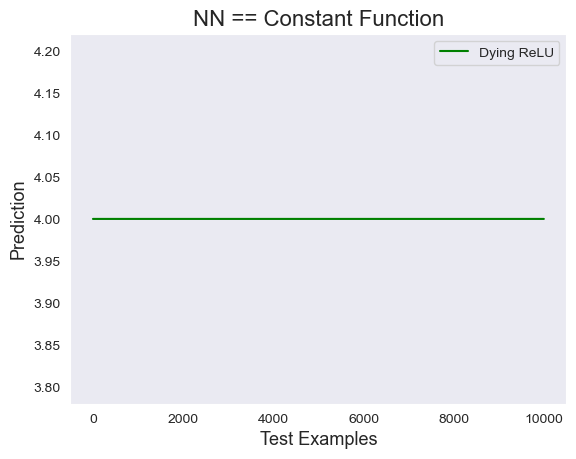

In [80]:
print(f"Μέσος όρος και τυπική απόκλιση των προβλέψεων: {np.mean(dying_relu.predict(X_test))} & {np.std(dying_relu.predict(X_test))}")
plt.title("NN == Constant Function", fontsize='16')
plt.plot(dying_relu.predict(X_test),color='g', label="Dying ReLU")
plt.xlabel("Test Examples",fontsize='13')
plt.ylabel("Prediction",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h4>Παρατηρήσεις</h4>
<ul>
    <li>Μετά από 50 περίπου εποχές ο αλγόριθμος έχει συγκλίνει και βλέπουμε πως το δίκτυο δεν εκπαιδεύεται.</li>
    <li>Μάλιστα, είμαστε στο σενάριο όπου το δίκτυο έχει μετατραπεί σε μια constant function (Ανξαρτήτως εισόδου, η έξοδος ισούται με c, όπου c μια σταθερή τιμή)</li>
    <li>Αυτό βέβαια το πείραμα αποτελεί μια ακραία περίπτωση που είναι σχετικά δύσκολο να την συναντήσουμε στην πράξη, απλά θέλαμε να τονίσουμε πως δεν υπάρχει μια λύση για όλα. Για παράδειγμα, ακόμα και σε αυτήν την ακραία περίπτωση παρατηρούμε ότι εάν χρησιμοποιήσουμε tanh αντί για ReLU το δίκτυο εκπαιδεύεται</li>
</ul>

In [81]:
# 3 hidden layers with Tanh
tanh_to_the_rescue = MLPClassifierLargeNegativebias(hidden_layer_sizes=(10,20,20),activation="tanh", solver="adam",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
tanh_to_the_rescue.fit(X_train,Y_train)

Iteration 1, loss = 32.53420300
Iteration 2, loss = 32.53420300
Iteration 3, loss = 32.53420300
Iteration 4, loss = 32.53420300
Iteration 5, loss = 32.23144421
Iteration 6, loss = 31.06800880
Iteration 7, loss = 29.85639548
Iteration 8, loss = 29.21451647
Iteration 9, loss = 29.20771333
Iteration 10, loss = 29.20761535
Iteration 11, loss = 29.20705004
Iteration 12, loss = 29.20684150
Iteration 13, loss = 29.20654166
Iteration 14, loss = 29.20595144
Iteration 15, loss = 29.20616516
Iteration 16, loss = 29.20581944
Iteration 17, loss = 29.20546384
Iteration 18, loss = 29.20495002
Iteration 19, loss = 29.20509109
Iteration 20, loss = 29.20436943
Iteration 21, loss = 29.20437407
Iteration 22, loss = 29.20395908
Iteration 23, loss = 29.20374065
Iteration 24, loss = 29.20346027
Iteration 25, loss = 29.20319978
Iteration 26, loss = 29.20299910
Iteration 27, loss = 29.20259470
Iteration 28, loss = 29.20234688
Iteration 29, loss = 29.20202735
Iteration 30, loss = 29.20220451
Iteration 31, loss 

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifierLargeNegativebias(activation='tanh', alpha=0.0,
                               hidden_layer_sizes=(10, 20, 20), momentum=0,
                               n_iter_no_change=50, random_state=42,
                               verbose=True)

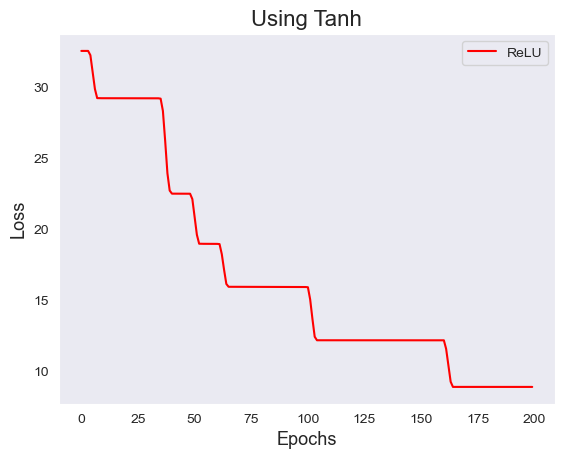

In [86]:
plt.title("Using Tanh", fontsize='16')
plt.plot(tanh_to_the_rescue.loss_curve_,color='r', label="Tanh")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h2>Περίπτωση 3: Αρχικοποίηση των βαρών με κατάλληλες(appropriate) αρχικές τιμές</h2>
<h3>Σε αυτό το πείραμα θα χρησιμοποιήσουμε την αρχικοποίηση των βαρών και των biases που κάνει η sklearn, η οποία σύμφωνα με το documentation χρησιμοποιεί τη μέθοδο του Xavier Glorot (Για περισσότερες λεπτομέρειες βλέπε το αντίστοιχο <a href="http://proceedings.mlr.press/v9/glorot10a">paper</a>)</h3>


In [87]:
appropriate_weights = MLPClassifier(hidden_layer_sizes=(5,5,5),activation="relu", solver="sgd",max_iter=200, alpha=0.0, random_state=RANDOM_STATE, verbose=True, momentum=0, n_iter_no_change=50)
appropriate_weights.fit(X_train,Y_train)

Iteration 1, loss = 2.35665493
Iteration 2, loss = 2.11672371
Iteration 3, loss = 2.02839906
Iteration 4, loss = 1.98226206
Iteration 5, loss = 1.95521262
Iteration 6, loss = 1.93632425
Iteration 7, loss = 1.92096014
Iteration 8, loss = 1.90736728
Iteration 9, loss = 1.89504259
Iteration 10, loss = 1.88408899
Iteration 11, loss = 1.87421307
Iteration 12, loss = 1.86505347
Iteration 13, loss = 1.85661643
Iteration 14, loss = 1.84857788
Iteration 15, loss = 1.84099978
Iteration 16, loss = 1.83387568
Iteration 17, loss = 1.82709988
Iteration 18, loss = 1.82070551
Iteration 19, loss = 1.81450193
Iteration 20, loss = 1.80855618
Iteration 21, loss = 1.80297230
Iteration 22, loss = 1.79778222
Iteration 23, loss = 1.79260114
Iteration 24, loss = 1.78769090
Iteration 25, loss = 1.78319134
Iteration 26, loss = 1.77873304
Iteration 27, loss = 1.77477191
Iteration 28, loss = 1.77083352
Iteration 29, loss = 1.76707346
Iteration 30, loss = 1.76345762
Iteration 31, loss = 1.75995697
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=0.0, hidden_layer_sizes=(5, 5, 5), momentum=0,
              n_iter_no_change=50, random_state=42, solver='sgd', verbose=True)

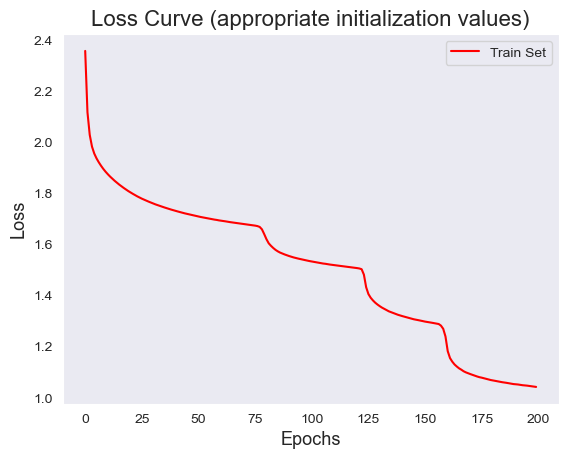

In [88]:
plt.title("Loss Curve (appropriate initialization values)", fontsize='16')
plt.plot(appropriate_weights.loss_curve_,color='r', label="Train Set")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h3>Παρατηρήσεις</h3>
<ul>
    <li>Χρησιμοποιήσαμε στην εκπαίδευση τις ίδιες υπέρ - παραμέτρους με τις περιπτώσεις 1(large initialization) και 2(small initialization), ώστε να κάνουμε όσο το δυνατόν πιο δίκαια τη σύγκριση των 3 δικτύων</li>
    <li>Παρατηρούμε ότι το δίκτυο εκπαιδεύεται καθώς αυξάνονται οι εποχές.</li>
</ul>

<h2>Τελικά συμπεράσματα αναφορικά με την αρχικοποίηση των βαρών του Νευρωνικού Δικτύου</h2>
<ul>
    <li>Αρχικοποίηση με πολύ μεγάλες τιμές οδηγεί σε αδυναμία εκπαίδευσης</li>
    <li>Αρχικοποίηση με πολύ μικρές τιμές οδηγεί σε αργή εκπαίδευση</li>
    <li>Η επιλογή κατάλληλων αρχικών τιμών έχουν σημαντικό αντίκτυπο στην αποτελεσματική εκπαίδευση του δικτύου (π.χ. αρχικές τιμές που είναι στο γραμμικό κομμάτι της sigmoid ή της ReLU)</li>
</ul>


<h2> Κανονικοποίηση (<cite><a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf">Πηγή Αναφοράς: " LeCun's efficient backprop paper" </a></cite>)</h2>
<h3>Η σύγκλιση του αλγορίθμου βελτιστοποίησης είναι συνήθως γρηγορότερη εφόσον ο μέσος όρος κάθε μεταβλητής εισόδου είναι κοντά στο μηδέν.</h3>
<ul>Για αυτό τον λόγο θα κάνουμε το εξής πείραμα: θα δοκιμάσοουμε να εκπαιδεύσουμε ένα μοντέλο:
    <li>Όταν πριν έχουμε κάνει Normalization</li>
    <li>Όταν πριν έχουμε κάνει Standardization</li>
    <li>Όταν πριν ΔΕΝ έχουμε κάνει κάποιο pre-processing τα Data</li>
</ul>
<h5>Tip: Ό,τι μετασχηματισμούς κάνουμε στο Train Set, πρέπει να τους κάνουμε και στο Test Set</h5>

<h3>Normalization</h3>
<img src="https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg" width="500" height="300">

In [109]:
scaler = MinMaxScaler(feature_range=(0, 1)) # Όλες οι τιμές κάθε μεταβλητής εισόδου θα είναι στο εύρος από 0 έως 1
# Εφόσον ξέρουμε ότι τα δεδομένα μας σε κάθε διάσταση είναι ένας αριθμός από το 0 έως το 255 είναι προτιμότερο να κάνουμε χειροκίνητα /255 και να μην χρησιμοποιήσουμε τον MinMaxScaler, γιατί σε κάποια διάσταση μπορεί να μην έχουμε κάποιο pixel που να παίρνει τιμή ίση με 255 και άρα ο MinMaxScaler να μη δώσει το 1 στην τιμή 255 όπως θα αναμέναμε.
X_train_Normalization = scaler.fit_transform(X_train)
X_test_Normalization = scaler.transform(X_test) #Στο Test set δεν κάνουμε fit_transform, αλλά σκέτο transform
mlp_Normalization = MLPClassifier(hidden_layer_sizes=(50,50), activation="relu", solver="sgd", alpha=0, max_iter=200, random_state=RANDOM_STATE, verbose=True) # για 200 εποχές
mlp_Normalization.fit(X_train_Normalization,Y_train)

Iteration 1, loss = 1.73837952
Iteration 2, loss = 0.78926861
Iteration 3, loss = 0.53546588
Iteration 4, loss = 0.44449377
Iteration 5, loss = 0.39692682
Iteration 6, loss = 0.36704701
Iteration 7, loss = 0.34580723
Iteration 8, loss = 0.32955562
Iteration 9, loss = 0.31642443
Iteration 10, loss = 0.30524366
Iteration 11, loss = 0.29568271
Iteration 12, loss = 0.28698292
Iteration 13, loss = 0.27915746
Iteration 14, loss = 0.27197352
Iteration 15, loss = 0.26519426
Iteration 16, loss = 0.25881261
Iteration 17, loss = 0.25298378
Iteration 18, loss = 0.24740493
Iteration 19, loss = 0.24220077
Iteration 20, loss = 0.23713599
Iteration 21, loss = 0.23213223
Iteration 22, loss = 0.22751157
Iteration 23, loss = 0.22326591
Iteration 24, loss = 0.21922366
Iteration 25, loss = 0.21497572
Iteration 26, loss = 0.21135771
Iteration 27, loss = 0.20758706
Iteration 28, loss = 0.20390845
Iteration 29, loss = 0.20064923
Iteration 30, loss = 0.19716345
Iteration 31, loss = 0.19384051
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=0, hidden_layer_sizes=(50, 50), random_state=42,
              solver='sgd', verbose=True)

In [104]:
mlp_Normalization_predictions = mlp_Normalization.predict(X_test_Normalization)
print("Pre-processing method: Normalization")
print("Accuracy: " + str(accuracy_score(Y_test,mlp_Normalization_predictions)))
print("F1-Score: " + str(f1_score(Y_test,mlp_Normalization_predictions,average='macro')))
print("Precision: " + str(precision_score(Y_test,mlp_Normalization_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,mlp_Normalization_predictions,average='macro')))
print("Log Loss: " + str(log_loss(Y_test,mlp_Normalization.predict_proba(X_test_Normalization))))

Pre-processing method: Normalization
Accuracy: 0.9715
F1-Score: 0.971232488583213
Precision: 0.9713795601740267
Recall: 0.9711423815733232
Log Loss: 0.09568973865425232


<h2>Standardization</h2>
<img src="https://miro.medium.com/max/970/0*3E-1O6yCamLFE3qE">

In [110]:
scaler_train = StandardScaler().fit(X_train)
X_train_Standardization = scaler_train.transform(X_train)
# scaler_test = StandardScaler().fit(X_test)
# X_test_Standardization = scaler_test.transform(X_test)
X_test_Standardization = scaler_train.transform(X_test)
mlp_Standardization = MLPClassifier(hidden_layer_sizes=(50,50), activation="relu", solver="sgd", alpha=0, max_iter=200, random_state=RANDOM_STATE, verbose=True) # για 200 εποχές
mlp_Standardization.fit(X_train_Standardization,Y_train)

Iteration 1, loss = 1.34215440
Iteration 2, loss = 0.53290031
Iteration 3, loss = 0.38477760
Iteration 4, loss = 0.32384409
Iteration 5, loss = 0.28728518
Iteration 6, loss = 0.26210454
Iteration 7, loss = 0.24287172
Iteration 8, loss = 0.22738582
Iteration 9, loss = 0.21465092
Iteration 10, loss = 0.20386519
Iteration 11, loss = 0.19457024
Iteration 12, loss = 0.18632641
Iteration 13, loss = 0.17908510
Iteration 14, loss = 0.17246193
Iteration 15, loss = 0.16660742
Iteration 16, loss = 0.16118461
Iteration 17, loss = 0.15614534
Iteration 18, loss = 0.15147898
Iteration 19, loss = 0.14715747
Iteration 20, loss = 0.14302445
Iteration 21, loss = 0.13921283
Iteration 22, loss = 0.13558714
Iteration 23, loss = 0.13220997
Iteration 24, loss = 0.12905395
Iteration 25, loss = 0.12584673
Iteration 26, loss = 0.12301449
Iteration 27, loss = 0.12019305
Iteration 28, loss = 0.11754668
Iteration 29, loss = 0.11496652
Iteration 30, loss = 0.11254932
Iteration 31, loss = 0.11015600
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=0, hidden_layer_sizes=(50, 50), random_state=42,
              solver='sgd', verbose=True)

In [108]:
mlp_Standardization_predictions = mlp_Standardization.predict(X_test_Standardization)
print("Pre-processing method: Standardization")
print("Accuracy: " + str(accuracy_score(Y_test,mlp_Standardization_predictions)))
print("F1-Score: " + str(f1_score(Y_test,mlp_Standardization_predictions,average='macro')))
print("Precision: " + str(precision_score(Y_test,mlp_Standardization_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,mlp_Standardization_predictions,average='macro')))
print("Log Loss: " + str(log_loss(Y_test,mlp_Standardization.predict_proba(X_test_Standardization))))

Pre-processing method: Standardization
Accuracy: 0.9678
F1-Score: 0.967517928335558
Precision: 0.9675966754259238
Recall: 0.9674621683003052
Log Loss: 0.1505389369021806


<h2>No pre-processing</h2>

In [109]:
mlp_no_preprocessing = MLPClassifier(hidden_layer_sizes=(50,50), activation="relu", solver="sgd", alpha=0, max_iter=200, random_state=RANDOM_STATE, verbose=True) # για 200 εποχές
mlp_no_preprocessing.fit(X_train,Y_train)

Iteration 1, loss = 2.59525451
Iteration 2, loss = 2.04291475
Iteration 3, loss = 2.02170405
Iteration 4, loss = 2.00905964
Iteration 5, loss = 1.98733169
Iteration 6, loss = 1.85956396
Iteration 7, loss = 1.77790237
Iteration 8, loss = 1.74573317
Iteration 9, loss = 1.75052556
Iteration 10, loss = 1.71838252
Iteration 11, loss = 1.69084730
Iteration 12, loss = 1.65212284
Iteration 13, loss = 1.49366285
Iteration 14, loss = 1.36980897
Iteration 15, loss = 1.28629187
Iteration 16, loss = 1.19183943
Iteration 17, loss = 1.11621169
Iteration 18, loss = 1.04481753
Iteration 19, loss = 0.93306978
Iteration 20, loss = 0.82474389
Iteration 21, loss = 0.76187855
Iteration 22, loss = 0.71369070
Iteration 23, loss = 0.69282439
Iteration 24, loss = 0.67883749
Iteration 25, loss = 0.67087188
Iteration 26, loss = 0.66182986
Iteration 27, loss = 0.65662394
Iteration 28, loss = 0.65218489
Iteration 29, loss = 0.65042499
Iteration 30, loss = 0.64401637
Iteration 31, loss = 0.64086171
Iteration 32, los

MLPClassifier(alpha=0, hidden_layer_sizes=(50, 50), random_state=42,
              solver='sgd', verbose=True)

In [110]:
mlp_no_preprocessing_predictions = mlp_no_preprocessing.predict(X_test)
print("Pre-processing method: None")
print("Accuracy: " + str(accuracy_score(Y_test,mlp_no_preprocessing_predictions)))
print("F1-Score: " + str(f1_score(Y_test,mlp_no_preprocessing_predictions,average='macro')))
print("Precision: " + str(precision_score(Y_test,mlp_no_preprocessing_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,mlp_no_preprocessing_predictions,average='macro')))
print("Log Loss: " + str(log_loss(Y_test,mlp_no_preprocessing.predict_proba(X_test))))

Pre-processing method: None
Accuracy: 0.8138
F1-Score: 0.8107299169961362
Precision: 0.811696468965798
Recall: 0.8115650436746946
Log Loss: 0.6040173319771848


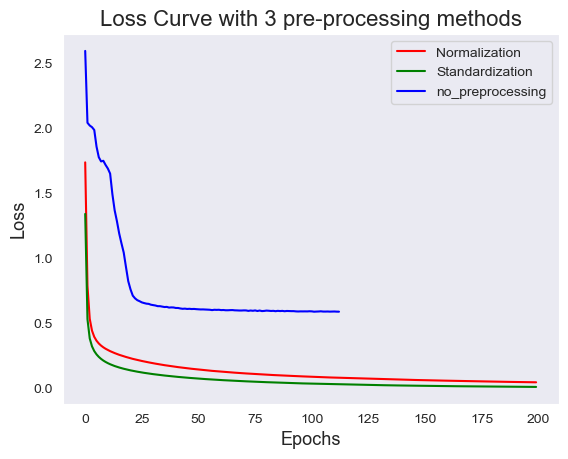

In [111]:
plt.title("Loss Curve with 3 pre-processing methods", fontsize='16')
plt.plot(mlp_Normalization.loss_curve_,color='r', label="Normalization")
plt.plot(mlp_Standardization.loss_curve_,color='g', label="Standardization")
plt.plot(mlp_no_preprocessing.loss_curve_,color='b', label="no_preprocessing")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h3>Συμπεράσματα</h3>
<ul>
    <li>Παρατηρούμε ότι πράγματι τόσο το normalization όσο και το standardization επιδρούν θετικά στην εκπαίδευση του δικτύου, καθώς βλέπουμε ότι για 200 εποχές τα δίκτυα στα οποία έγινε το pre-processing εκπαιδεύτηκαν και πιο γρήγορα (γρηγορότερη σύγκλιση) αλλά έχουν καλύτερες επιδόσεις σε σχέση με το δίκτυο που εκπαιδεύτηκε χωρίς pre-processing. Συμπερασματικά, λοιπόν, μπορούμε να πούμε ότι στην διαδικασία εκπαίδευσης ενός δικτύου σημαντικό ρόλο παίζει και το κομμάτι του pre-processing και πως θα πρέπει να το κάνουμε πριν την εκπαίδευση, ιδιαίτερα στην περίπτωση όπου οι μεταβλητές εισόδου είναι σε διαφορετικές κλίμακες.</li>
    <li>Αναφορικά με την σύγκριση των 2 pre-processing methods, μπορούμε να πούμε τα εξής:</li>
    <ul>
        <li>Το Normalization μας δίνει λίγο καλύτερες επιδόσεις σε σχέση με το Standardization</li>
        <li>Το Standardization παρατηρούμε ότι έχει λίγο πιο γρήγορη σύγκλιση σε σχέση με το Normalization</li>
    </ul>
</ul>

<h2>One Hot Encoding</h2>
<h3>Στο συγκεκριμένο πείραμα θα δοκιμάσουμε 2 διαφορετικούς τρόπους κωδικοποίησης της εξόδου:</h3>
<ol>
    <li>Στο Layer εξόδου θα έχουμε έναν νευρώνα εξόδου για κάθε ένα ψηφίο(label), δηλαδή συνολικά 10 νευρώνες. Κάθε φορά που ένα training example θα γίνεται feed μέσα στο νευρωνικό δίκτυο, θα θέλαμε ιδανικά οι 9 νευρώνες να βγάζουν μηδέν (ή έστω έναν αριθμό κοντά στο μηδέν) ενώ ο 1 να βγάζει ως έξοδο ένα (ή έστω έναν αριθμό κοντά στο ένα). Αυτού του είδους η κωδικοποίηση ονομάζεται One Hot Encoding(OHE). Η sklearn μετατρέπει εσωτερικά τα labels που έχουμε σε One Hot διανύσματα, οπότε εμείς δεν χρειάζεται να κάνουμε κάποιο pre-processing(<a href="https://stats.stackexchange.com/questions/349655/handle-categorical-class-labels-for-scikit-learn-mlpclassifier">Handle categorical class labels for scikit-learn MLPClassifier</a>)</li>
    <li>Στο Layer εξόδου θα έχουμε έναν νευρώνα εξόδου, ο οποίος θα ιδανικά θα θέλαμε να μας βγάζει στην έξοδο το ψηφίο το οποίο έγινε feed στο Νευρωνικό Δίκτυο. Για παράδειγμα, εάν δώσουμε σαν είσοδο μια εικόνα με τον αριθμό 3, θα θέλαμε ο ένας και μοναδικός νευρώνας εξόδου που έχουμε να μας βγάλει τον αριθμό 3 (ή έστω έναν αριθμό κοντά στο 3).</li>
</ol>

<h3>Περίπτωση 1: One Hot Encoding</h3>

In [43]:
mlp_OHE = MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",max_iter=200,random_state=RANDOM_STATE,verbose=True) #εκπαίδευση για 200 εποχές
mlp_OHE.fit(X_train,Y_train)

Iteration 1, loss = 3.09808344
Iteration 2, loss = 0.79391884
Iteration 3, loss = 0.48379687
Iteration 4, loss = 0.34730206
Iteration 5, loss = 0.27538638
Iteration 6, loss = 0.22852917
Iteration 7, loss = 0.18987851
Iteration 8, loss = 0.16557583
Iteration 9, loss = 0.15347231
Iteration 10, loss = 0.13769901
Iteration 11, loss = 0.11954027
Iteration 12, loss = 0.11588888
Iteration 13, loss = 0.10676619
Iteration 14, loss = 0.09987728
Iteration 15, loss = 0.09930234
Iteration 16, loss = 0.08916649
Iteration 17, loss = 0.08306058
Iteration 18, loss = 0.08185489
Iteration 19, loss = 0.07857981
Iteration 20, loss = 0.07794721
Iteration 21, loss = 0.07882528
Iteration 22, loss = 0.06943778
Iteration 23, loss = 0.06464198
Iteration 24, loss = 0.06271668
Iteration 25, loss = 0.06603523
Iteration 26, loss = 0.06182133
Iteration 27, loss = 0.05747020
Iteration 28, loss = 0.05823535
Iteration 29, loss = 0.05209688
Iteration 30, loss = 0.05109355
Iteration 31, loss = 0.05083410
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42, verbose=True)

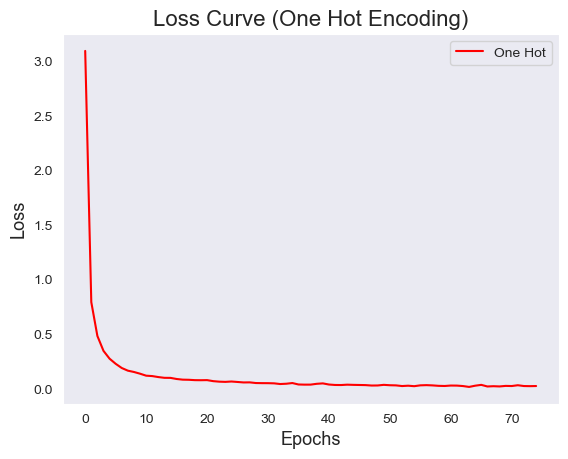

Αριθμός νευρώνων στο output layer: 10


In [51]:
plt.title("Loss Curve (One Hot Encoding)", fontsize='16')
plt.plot(mlp_OHE.loss_curve_,color='r', label="One Hot")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()
print(f"Αριθμός νευρώνων στο output layer: {mlp_OHE.n_outputs_}")

<h3>Περίπτωση 2: No Encoding</h3>

In [42]:
mlp_no_encoding = MLPRegressor(hidden_layer_sizes=(50,50),activation="relu",max_iter=200,random_state=RANDOM_STATE,verbose=True) #για 200 εποχές
mlp_no_encoding.fit(X_train,Y_train)

Iteration 1, loss = 123.24287790
Iteration 2, loss = 5.51039235
Iteration 3, loss = 3.35092276
Iteration 4, loss = 2.55282919
Iteration 5, loss = 2.05925829
Iteration 6, loss = 1.78012925
Iteration 7, loss = 1.59931706
Iteration 8, loss = 1.46409383
Iteration 9, loss = 1.37327709
Iteration 10, loss = 1.28071562
Iteration 11, loss = 1.22267567
Iteration 12, loss = 1.16949418
Iteration 13, loss = 1.11234142
Iteration 14, loss = 1.06802262
Iteration 15, loss = 1.01446215
Iteration 16, loss = 0.98715955
Iteration 17, loss = 0.94730727
Iteration 18, loss = 0.92314819
Iteration 19, loss = 0.87926246
Iteration 20, loss = 0.85590124
Iteration 21, loss = 0.82005105
Iteration 22, loss = 0.81634516
Iteration 23, loss = 0.76673404
Iteration 24, loss = 0.71590662
Iteration 25, loss = 0.70144638
Iteration 26, loss = 0.68560263
Iteration 27, loss = 0.66606896
Iteration 28, loss = 0.62484365
Iteration 29, loss = 0.61695695
Iteration 30, loss = 0.58871329
Iteration 31, loss = 0.57574838
Iteration 32, l

MLPRegressor(hidden_layer_sizes=(50, 50), random_state=42, verbose=True)

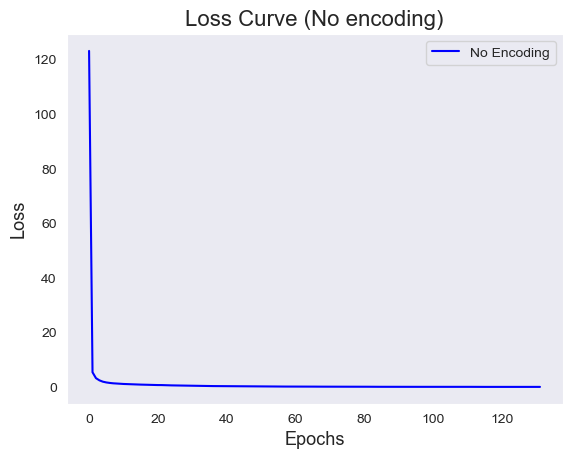

Αριθμός νευρώνων στο output layer: 1


In [52]:
plt.title("Loss Curve (No encoding)", fontsize='16')
plt.plot(mlp_no_encoding.loss_curve_,color='b', label="No Encoding")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()
print(f"Αριθμός νευρώνων στο output layer: {mlp_no_encoding.n_outputs_}")

<h3>Παρατηρήσεις</h3>
<ul>
    <li>Το mlp με One Hot Encoding σε 75 εποχές εκπαίδευσης έχει συγκλίνει έχοντας σχεδόν μηδενικό loss.</li>
    <li>Το mlp με έναν νευρώνα εξόδου (no encoding) σε 132 εποχές εκπαίδευσης έχει συγκλίνει έχοντας ένα πολύ χαμηλό loss, το οποίο βέβαια είναι πιο μεγάλο σε σχέση με αυτό της περίπτωσης του One Hot.</li>
    <li>Γιατί στην πρώτη περίπτωση του One Hot συγκλίνει και πιο γρήγορα (περίπου στις μισές εποχές) και έχει καταφέρει να μειώσει και πιο πολύ το loss?</li>
    <li>Το task που έχουμε να λύσουμε είναι ένα classification πρόβλημα. Χρησιμοποιώντας έναν μόνο νευρώνα εξόδου είναι σαν να μετατρέπουμε το πρόβλημα από classification σε regression και για αυτό χρησιμοποιήθηκε και ο MLPRegressor αντί του classifier. Σε μια τέτοια περίπτωση υπονοείται η υπόθεση ότι αριθμοί που είναι αριθμητικά πιο κοντά (για παράδειγμα το 0 με το 1) ΜΟΙΑΖΟΥΝ και πιο πολύ μεταξύ τους.</li>
    <li>Ναι μεν εμείς οι άνθρωποι έχουμε βάλει τους αριθμούς σε μια σειρά (order) αλλά για το task που πάμε να λύσουμε δεν έχει φυσικό νόημα να πούμε στο μοντέλο ότι κάποιοι αριθμοί είναι πιο κοντά σε σχέση με κάποιους άλλους. Για παράδειγμα, το να πιέσουμε το μοντέλο μας να μάθει ότι το 0 είναι πιο κοντά στο 1 από ότι είναι στο 8(επειδή η euclidean_distance(0,1) είναι μικρότερη σε σχέση με την euclidean_distance(0,8)) είναι κάτι το οποίο δε βοηθάει στο learning -ίσα ίσα που το 0 μοιάζει πιο πολύ με το 8 σαν ψηφίο. Άρα πρέπει να θεωρήσουμε ότι τα labels δεν είναι ordinal (παρόλο που έχουμε αριθμούς) και να γίνει χρήση του OHE, καθώς αυτό συνεισφέρει στην καλύτερη και γρηγορότερη εκπαίδευση του δικτύου.</li>
</ul>

<h2>Batch, Stochastic and Mini-Batch Gradient Descent</h2>
<ul>
    <li>Ο Batch Gradient Descent εξετάζει όλα τα παραδείγματα εκπαίδευσης και στη συνέχεια κάνει update τα weights και τα biases του δικτύου. Αυτό είναι φοβερά αργό, μιας και στο τέλος κάθε εποχής ο αλγόριθμος βελτιστοποίησης κάνει ένα μικρό βηματάκι προς το ελάχιστο και συνεπώς η σύγκλιση προς το (τοπικό) ελάχιστο είναι πάρα πολύ αργή. Ωστόσο, αυτή η περίπτωση έχει το πλεονέκτημα ότι ο αλγόριθμος έχει την καθολική εικόνα της (και όχι κομμάτι) της συνάρτησης κόστους J<sup>global</sup> και άρα κάνει συστηματικά βήματα προς την κατεύθυνση που βελτιστοποιεί ολόκληρο το J.</li>
    <li>Ο Stochastic Gradient Descent μόλις εξετάσει ένα παράδειγμα εκπαίδευσης κάνει update τα weights και τα biases του δικτύου. Δηλαδή ο αλγόριθμος βελτιστοποίησης βελτιστοποιεί έχοντας το κομμάτι της συνάρτησης κόστους που αντιστοιχεί στο συγκεκριμένο training example (Βελτιστοποιεί για παράδειγμα ως προς J<sup>23</sup>). Εκτελώντας πολλές επαναλήψεις βελτισοτοποιείται και το συνολικό κόστος J<sup>global</sup>. Σε αυτήν την περίπτωση η σύγκλιση προς το (τοπικό) ελάχιστο είναι εξαιρετικά πιο γρήγορη σε σχέση με τον Batch GD. Αξίζει να τονίσουμε ότι ο Stochastic GD είναι αρκετά ευαίσθητος στον θόρυβο που υπάρχουν στα δεδομένα.</li>
    <li>Ο Mini-Batch GD αποτελεί μια ενδιάμεση λύση των δύο παραπάνω αλγορίθμων, όπου ο αλγόριμος βελτιστοποίησης εξετάζει κάθε φορά ένα batch από training examples και στη συνέχεια κάνει update τα weights και τα biases του δικτύου. Και σε αυτήν την περίπτωση βελτιστοποιούμε έχοντας ένα κομμάτι της συνάρτησης κόστους J, προφανώς όμως έχουμε μια πιο αντιπροσωπευτική άποψη της καθολικής εικόνας της συνάρτησης κόστους και άρα μπορούμε να συγκλίνουμε με πιο σίγουρα βήματα (σε σχέση με τον Stochastic) προς το (τοπικό) ελάχιστο και μάλιστα αρκετά γρήγορα (πολύ πιο γρήγορα σε σχέση με τον Batch GD). Να επισημάνουμε ότι μεγαλύτερα Batch Sizes μας δίνουν την δυνατότητα να κάνουμε αποθορυβοποίηση τα δεδομένα (για αυτό και ο Batch GD δεν είναι ευαίσθητος στον θόρυβο), ενώ μικρότερα Batch Sizes μας επιτρέπουν ξεπερνάμε (ενδεχομένως) τοπικά ελάχιστα, καθώς το ένα batch με κάποιο επόμενο μπορεί να κάνουν regularize. Για αυτό στην πράξη, τις περισσότερες φορές η χρήση Mini - batch GD μαζί με adaptive learning rate μας δίνει πολύ καλύτερες εκπαιδεύσεις.</li>
</ul>

<h4>Στο παρακάτω πείραμα βάζουμε τεχνητό θόρυβο στα δεδομένα μας (για να δυσκολέψουμε την εκπαίδευση και να εξετάσουμε κατά πόσο η ύπαρξη θορύβου επηρεάζει τους αλγορίθμους) και εκπαιδεύουμε και με τις τρεις παραλλαγές του Gradient Descent</h4>

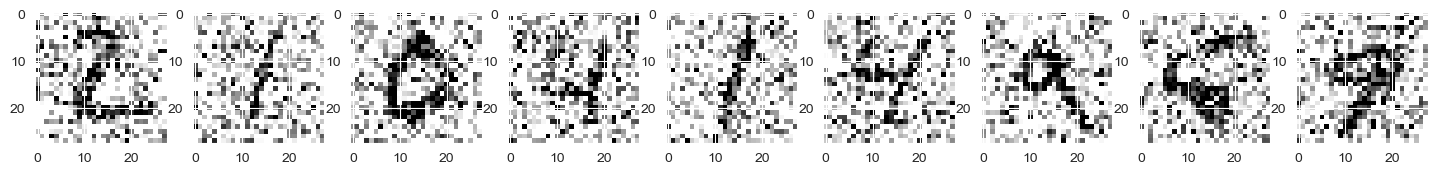

In [72]:
#Χρησιμοποιούμε τα κανονικοποιημένα Train και Test Sets
#Add artificial noise
#Random noise from normal distribution with mean at 0 and std dev of 1.
noise_factor = 0.5
X_train_noisy = X_train_Normalization + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_Normalization.shape)
X_test_noisy = X_test_Normalization + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_Normalization.shape)

#Θέτουμε όλες τις τιμές των pixels να είναι ανάμεσα στο 0 και στο 1
#Ουσιαστικά, απλώνουμε τα λευκά pixels και μαζεύουμε τα μαύρα pixels
#Για να φανούν οπτικά καλύτερα οι εικόνες, διαφορετικά θα είχαμε πολύ γκρι και δε θα μπορούσαμε να διακρίνουμε τα ψηφία
X_train_noisy = np.clip(X_train_noisy,0.0,1.0)
X_test_noisy = np.clip(X_test_noisy,0.0,1.0)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [96]:
# Batch GD
batch_gradient_descent = MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",solver="sgd",alpha=0,batch_size=len(X_train_noisy),max_iter=1500,random_state=RANDOM_STATE,verbose=True,momentum=0)
start_time = time.time()
batch_gradient_descent.fit(X_train_noisy,Y_train)
end_time = time.time()
total_time_batch_gd = end_time - start_time

Iteration 1, loss = 2.38154831
Iteration 2, loss = 2.38097306
Iteration 3, loss = 2.38040190
Iteration 4, loss = 2.37983516
Iteration 5, loss = 2.37927258
Iteration 6, loss = 2.37871443
Iteration 7, loss = 2.37816041
Iteration 8, loss = 2.37761039
Iteration 9, loss = 2.37706464
Iteration 10, loss = 2.37652293
Iteration 11, loss = 2.37598528
Iteration 12, loss = 2.37545115
Iteration 13, loss = 2.37492090
Iteration 14, loss = 2.37439433
Iteration 15, loss = 2.37387151
Iteration 16, loss = 2.37335272
Iteration 17, loss = 2.37283771
Iteration 18, loss = 2.37232635
Iteration 19, loss = 2.37181883
Iteration 20, loss = 2.37131505
Iteration 21, loss = 2.37081477
Iteration 22, loss = 2.37031770
Iteration 23, loss = 2.36982419
Iteration 24, loss = 2.36933405
Iteration 25, loss = 2.36884738
Iteration 26, loss = 2.36836430
Iteration 27, loss = 2.36788468
Iteration 28, loss = 2.36740840
Iteration 29, loss = 2.36693549
Iteration 30, loss = 2.36646565
Iteration 31, loss = 2.36599870
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [89]:
# Stochastic GD
stochastic_gradient_descent = MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",solver="sgd",alpha=0,batch_size=1,max_iter=100,random_state=RANDOM_STATE,verbose=True,momentum=0)
start_time = time.time()
stochastic_gradient_descent.fit(X_train_noisy,Y_train)
end_time = time.time()
total_time_stochastic_gd = end_time - start_time

Iteration 1, loss = 0.74735893
Iteration 2, loss = 0.45810135
Iteration 3, loss = 0.38541769
Iteration 4, loss = 0.32941741
Iteration 5, loss = 0.28678921
Iteration 6, loss = 0.25013527
Iteration 7, loss = 0.22210096
Iteration 8, loss = 0.19714680
Iteration 9, loss = 0.17575943
Iteration 10, loss = 0.15792891
Iteration 11, loss = 0.14089057
Iteration 12, loss = 0.12572646
Iteration 13, loss = 0.11156152
Iteration 14, loss = 0.09795429
Iteration 15, loss = 0.08544035
Iteration 16, loss = 0.07391377
Iteration 17, loss = 0.06343227
Iteration 18, loss = 0.05474502
Iteration 19, loss = 0.04584928
Iteration 20, loss = 0.03711815
Iteration 21, loss = 0.03074490
Iteration 22, loss = 0.02435077
Iteration 23, loss = 0.01986543
Iteration 24, loss = 0.01455299
Iteration 25, loss = 0.01133260
Iteration 26, loss = 0.00911464
Iteration 27, loss = 0.00745693
Iteration 28, loss = 0.00618294
Iteration 29, loss = 0.00535779
Iteration 30, loss = 0.00464027
Iteration 31, loss = 0.00413635
Iteration 32, los

In [101]:
# Mini - Batch GD
mini_batch_gradient_descent = MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",solver="sgd",alpha=0,batch_size=200,max_iter=750,random_state=RANDOM_STATE,verbose=True,momentum=0)
start_time = time.time()
mini_batch_gradient_descent.fit(X_train_noisy,Y_train)
end_time = time.time()
total_time_mini_batch_gd = end_time - start_time

Iteration 1, loss = 2.32997518
Iteration 2, loss = 2.27629130
Iteration 3, loss = 2.24286833
Iteration 4, loss = 2.20942568
Iteration 5, loss = 2.17058544
Iteration 6, loss = 2.12372497
Iteration 7, loss = 2.06802777
Iteration 8, loss = 2.00392439
Iteration 9, loss = 1.93244035
Iteration 10, loss = 1.85489453
Iteration 11, loss = 1.77334336
Iteration 12, loss = 1.68978280
Iteration 13, loss = 1.60689739
Iteration 14, loss = 1.52681332
Iteration 15, loss = 1.45099623
Iteration 16, loss = 1.38047986
Iteration 17, loss = 1.31552439
Iteration 18, loss = 1.25645569
Iteration 19, loss = 1.20278178
Iteration 20, loss = 1.15423159
Iteration 21, loss = 1.11036509
Iteration 22, loss = 1.07084817
Iteration 23, loss = 1.03504709
Iteration 24, loss = 1.00263649
Iteration 25, loss = 0.97315248
Iteration 26, loss = 0.94633066
Iteration 27, loss = 0.92176326
Iteration 28, loss = 0.89930520
Iteration 29, loss = 0.87867654
Iteration 30, loss = 0.85967210
Iteration 31, loss = 0.84213445
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


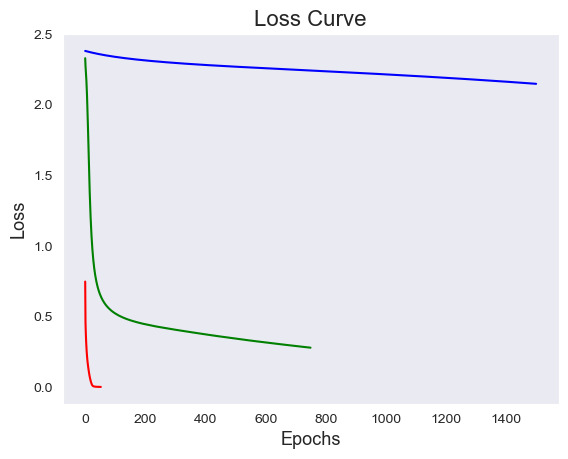

In [104]:
plt.title("Loss Curve", fontsize='16')
plt.plot(batch_gradient_descent.loss_curve_,color='b', label="Batch GD")
plt.plot(stochastic_gradient_descent.loss_curve_,color='r', label="Stochastic GD")
plt.plot(mini_batch_gradient_descent.loss_curve_,color='g', label="Mini Batch GD")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

In [105]:
print("Παρακάτω βλέπουμε τους χρόνους εκπαίδευσης και το accuracy για κάθε μία εκπαίδευση:")
print(f"Batch GD: χρόνος εκπαίδευσης({total_time_batch_gd} secs) - accuracy({accuracy_score(Y_test,batch_gradient_descent.predict(X_test_noisy))})")
print(f"Stochastic GD: χρόνος εκπαίδευσης({total_time_stochastic_gd} secs) - accuracy({accuracy_score(Y_test,stochastic_gradient_descent.predict(X_test_noisy))})")
print(f"Mini Batch GD: χρόνος εκπαίδευσης({total_time_mini_batch_gd} secs) - accuracy({accuracy_score(Y_test,mini_batch_gradient_descent.predict(X_test_noisy))})")

Παρακάτω βλέπουμε τους χρόνους εκπαίδευσης και το accuracy για κάθε μία εκπαίδευση:
Batch GD: χρόνος εκπαίδευσης(680.8681008815765 secs) - accuracy(0.274)
Stochastic GD: χρόνος εκπαίδευσης(1768.1948490142822 secs) - accuracy(0.9049)
Mini Batch GD: χρόνος εκπαίδευσης(453.7210683822632 secs) - accuracy(0.8825)


<h3>Παρατηρήσεις</h3>
<ul>
    <li>Στην περίπτωση που έχουμε σχετικά μεγάλο Batch Size εκμαιταλλευόμαστε το speed up του Hardware που διαθέτουμε(CPU και GPU). Για αυτό ακριβώς τον λόγο παρατηρούμε ότι ο Stochastic GD όπου δεν μπορεί να εκμαιταλλευτεί την παραλληλοποίηση που προσφέρει το Hardware χρειάστηκε σχεδόν <b>29 minutes</b>, ενώ οι άλλες δύο εκδοχές χρειάστηκαν κατά μέσο όρο <b>9 minutes</b>.</li>
    <li>Ο Batch GD έχει μια φοβερά αργή σύγλιση προς το ελάχιστο(1500 εποχές και το loss κυμαίνεται γύρω στο 2.1), με αποτέλεσμα και στα άγνωστα δεδομένα να πετυχαίνει χαμηλό accuracy.</li>
    <li>Ο Stochastic GD έχει μια φοβερά γρήγορη σύγλιση (έχει συγκλίνει σε 53 εποχές), ενώ μάλιστα πετυχαίνει και υψηλό accuracy στα άγνωστα δεδομένα.</li>
    <li>Ο Mini-Batch GD έχει μια σχετικά γρήγορη σύγκλιση, ενώ και αυτός πετυχαίνει υψηλό accuracy στα άγνωστα δεδομένα.</li>
    <li>Για να ερμηνεύσουμε σωστά, τα νούμερα και το plot που βλέπουμε παραπάνω πρέπει να έχουμε υπόψη μας ότι:</li>
    <ul>
        <li>Στην περίπτωση του Batch GD έγιναν συνολικά 1500 weight updates</li>
        <li>Στην περίπτωση του Stochastic GD έγιναν συνολικά `60.000*53 = 3.180.000` weight updates</li>
        <li>Στην περίπτωση του Mini - Batch GD έγιναν συνολικά `(60.000/200)*750 = 225.000` weight updates</li>
    </ul>
    <li>Παρατηρούμε, λοιπόν, ότι το πλήθος των weight updates που έχει κάνει ο Stochastic GD είναι πολύ πολύ περισσότερες σε σχέση με τις άλλες 2 και άρα έχει εκπαιδευτεί καλύτερα, γεγονός που έχει ως αποτέλεσμα να πετυχαίνει συγκριτικά και το υψηλότερο accuracy. Συνεπώς, η σύγκριση σε αυτό το πείραμα δεν ήταν δίκαιη!!!</li>
    <li>Αξιοσημείωτο είναι το γεγονός πως ο Stochastic GD δεν επηρεάστηκε από την ύπαρξη θορύβου που υπάρχει στο Data Set. Πάντως, στην γενικότερη περίπτωση ο Stochastic GD είναι ιδιαίτερα ευαίσθητος στον θόρυβο.</li>
</ul>

<h2>Τα Νευρωνικά δίκτυα ξεχνούν;;;</h2>
<h3>Η θεωρία μας λέει ότι σε κάθε εποχή πρέπει να ανακατεύουμε τα δεδομένα! Αυτό το κάνουμε για να μην έχει κάποιο bias το μοντέλο προς τα τελευταία δείγματα, μιας και τα τελευταία δείγματα είναι αυτά που κάνουν και τα τελευταία updates στα weights και biases του δικτύου.</h3>
<h3>Στο συγκεκριμένο πείραμα μαζεύουμε όλα τα παραδείγματα της κάθε κλάσης μαζί (Δηλαδή στην αρχή του Data Set έχουμε όλα τα training examples με label ίσο με 0, στη συνέχεια όλα τα training examples με label ίσο με 1, κ.ο.κ) και έτσι προκύπτει το νέο Data Set με το οποίο θα δουλέψουμε. Στη συνέχεια, εκπαιδεύουμε δύο μοντέλα. Στο πρώτο μοντέλο, μετά από κάθε εποχή δεν κάνουμε shuffle(ανακάτεμα) τα δεδομένα και συνεπώς το μοντέλο βλέπει τα δεδομένα με την ίδια σειρά σε όλες τις εποχές εκπαίδευσης. Στο δεύτερο μοντέλο, μετά από κάθε εποχή κάνουμε shuffle(ανακάτεμα).</h3>

<h4>Απαραίτητο pre-processing για την εκτέλεση του πειράματος</h4>

In [5]:
# Ενώνουμε τα X_train και Y_train
Y_train_expanded = np.expand_dims(Y_train,axis=1)
Training_set = np.hstack((X_train,Y_train_expanded))
# Μαζεύουμε όλα τα παραδείγματα της κάθε κλάσης μαζί (Δηλαδή στην αρχή του Data Set έχουμε όλα τα training examples με label ίσο με 0, στη συνέχεια όλα τα training examples με label ίσο με 1, κ.ο.κ)
Sorted_training_set = Training_set[Training_set[:, 784].argsort()]
# Κάνουμε split τα X_train και Y_train
Y_train_sorted = Sorted_training_set[:, -1] # for last column
X_train_sorted = Sorted_training_set[:, :-1] # for all but last column

(60000, 785)

<h4>Εκπαίδευση Μοντέλων</h4>

In [12]:
mlp_biased = MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",solver="sgd",alpha=0,batch_size=300,max_iter=200,random_state=RANDOM_STATE,verbose=True,momentum=0,shuffle=False)
mlp_biased.fit(X_train_sorted,Y_train_sorted)

Iteration 1, loss = 1.89059680
Iteration 2, loss = 2.13857253
Iteration 3, loss = 1.79983519
Iteration 4, loss = 1.40880454
Iteration 5, loss = 1.21401107
Iteration 6, loss = 0.99745222
Iteration 7, loss = 0.88095567
Iteration 8, loss = 0.81201712
Iteration 9, loss = 0.89886824
Iteration 10, loss = 0.70251607
Iteration 11, loss = 0.63279709
Iteration 12, loss = 0.59585458
Iteration 13, loss = 0.57058148
Iteration 14, loss = 0.55123415
Iteration 15, loss = 0.58984996
Iteration 16, loss = 0.55451603
Iteration 17, loss = 0.54628185
Iteration 18, loss = 0.53285816
Iteration 19, loss = 0.53225801
Iteration 20, loss = 0.51745823
Iteration 21, loss = 0.51329012
Iteration 22, loss = 0.51010372
Iteration 23, loss = 0.49002116
Iteration 24, loss = 0.45563660
Iteration 25, loss = 0.42904089
Iteration 26, loss = 0.45599503
Iteration 27, loss = 0.57536118
Iteration 28, loss = 0.42535314
Iteration 29, loss = 0.40843346
Iteration 30, loss = 0.40464727
Iteration 31, loss = 0.38888171
Iteration 32, los

MLPClassifier(alpha=0, batch_size=300, hidden_layer_sizes=(50, 50), momentum=0,
              random_state=42, shuffle=False, solver='sgd', verbose=True)

In [13]:
mlp_not_biased = MLPClassifier(hidden_layer_sizes=(50,50),activation="relu",solver="sgd",alpha=0,batch_size=300,max_iter=200,random_state=RANDOM_STATE,verbose=True,momentum=0,shuffle=True)
mlp_not_biased.fit(X_train_sorted,Y_train_sorted)

Iteration 1, loss = 3.41881756
Iteration 2, loss = 1.16187942
Iteration 3, loss = 0.85444436
Iteration 4, loss = 0.71269368
Iteration 5, loss = 0.62794297
Iteration 6, loss = 0.56787404
Iteration 7, loss = 0.52451801
Iteration 8, loss = 0.48950474
Iteration 9, loss = 0.46220507
Iteration 10, loss = 0.43964164
Iteration 11, loss = 0.41986183
Iteration 12, loss = 0.40289835
Iteration 13, loss = 0.38818453
Iteration 14, loss = 0.37536677
Iteration 15, loss = 0.36468082
Iteration 16, loss = 0.35366145
Iteration 17, loss = 0.34373006
Iteration 18, loss = 0.33557890
Iteration 19, loss = 0.32772922
Iteration 20, loss = 0.32049421
Iteration 21, loss = 0.31296981
Iteration 22, loss = 0.30718702
Iteration 23, loss = 0.30164250
Iteration 24, loss = 0.29649424
Iteration 25, loss = 0.29135893
Iteration 26, loss = 0.28676447
Iteration 27, loss = 0.28202122
Iteration 28, loss = 0.27824807
Iteration 29, loss = 0.27397175
Iteration 30, loss = 0.27008175
Iteration 31, loss = 0.26656856
Iteration 32, los

C:\Users\User\anaconda3\envs\MLenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=0, batch_size=300, hidden_layer_sizes=(50, 50), momentum=0,
              random_state=42, solver='sgd', verbose=True)

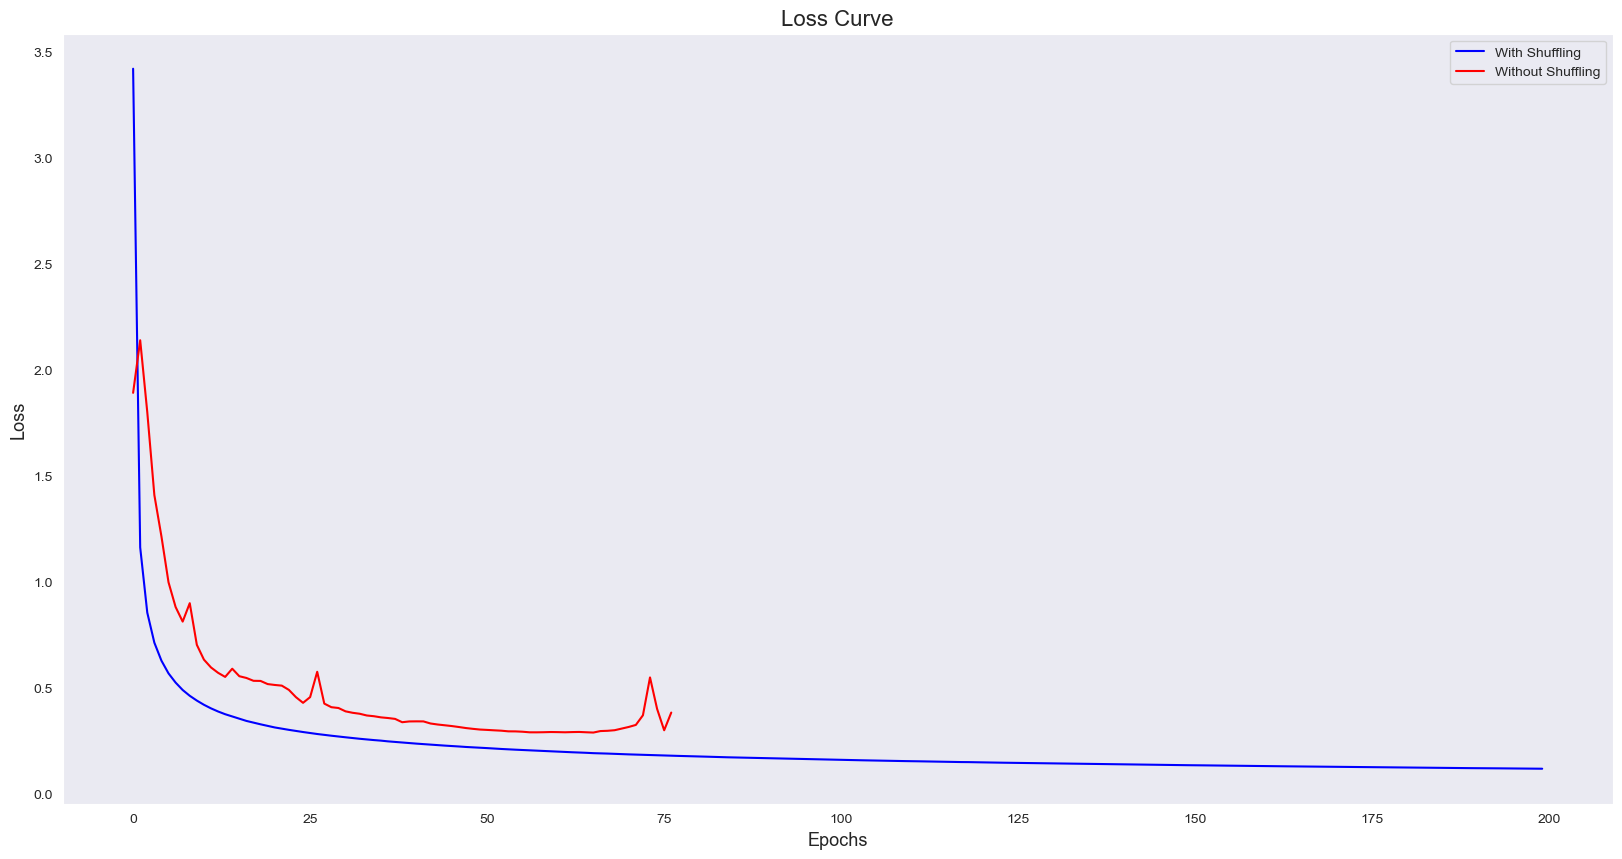

In [16]:
plt.figure(figsize=(20,10))
plt.title("Loss Curve", fontsize='16')
plt.plot(mlp_not_biased.loss_curve_,color='b', label="With Shuffling")
plt.plot(mlp_biased.loss_curve_,color='r', label="Without Shuffling")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

In [17]:
print("Παρακάτω βλέπουμε το accuracy για κάθε μία εκπαίδευση:")
print(f"Without Shuffling: accuracy({accuracy_score(Y_test,mlp_biased.predict(X_test))})")
print(f"With Shuffling: accuracy({accuracy_score(Y_test,mlp_not_biased.predict(X_test))})")

Παρακάτω βλέπουμε το accuracy για κάθε μία εκπαίδευση:
Without Shuffling: accuracy(0.3937)
With Shuffling: accuracy(0.9352)


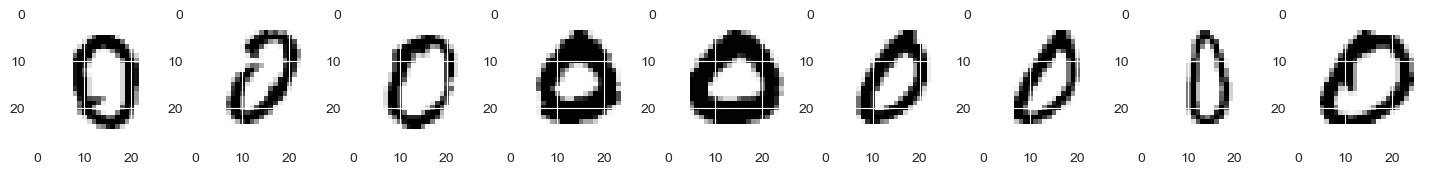

Without Shuffling: [0 5 0 0 0 0 0 8 0]
With Shuffling: [0 0 0 0 0 0 0 0 0]


In [37]:
biased_predictions = mlp_biased.predict(X_train_sorted[1:10])
not_biased_predictions = mlp_not_biased.predict(X_train_sorted[1:10])
#Displaying images with zeros
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(X_train_sorted[i].reshape(28, 28), cmap="binary",)
plt.show()
print(f"Without Shuffling: {biased_predictions}")
print(f"With Shuffling: {not_biased_predictions}")

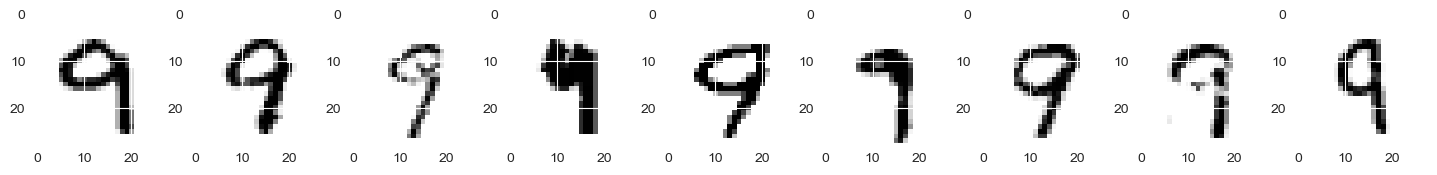

Without Shuffling: [9 9 9 9 9 9 9 9 9]
With Shuffling: [9 9 9 4 9 9 9 9 9]


In [40]:
biased_predictions = mlp_biased.predict(X_train_sorted[59900 + 1 : 59910])
not_biased_predictions = mlp_not_biased.predict(X_train_sorted[59900 + 1 : 59910])
#Displaying images with nines
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(X_train_sorted[i + 59900].reshape(28, 28), cmap="binary",)
plt.show()
print(f"Without Shuffling: {biased_predictions}")
print(f"With Shuffling: {not_biased_predictions}")

<h3>Παρατηρήσεις</h3>
<ul>
    <li>Στην περίπτωση που δεν ανακατεύουμε τα δεδομένα στην αρχή κάθε εποχής, η εκπαίδευση παρουσιάζει αστάθεια και πως ο αλγόριθμος βελτιστοποίησης αποκλίνει από το ελάχιστο (βλέπουμε το loss να ανεβαίνει σε κάποιες εποχές) -σε αντίθεση με την καμπύλη του loss όπου έχει μια συνεχόμενη πτωτική πορεία στην περίπτωση όπου γίνεται ανακάτεμα</li>
    <li>Στην περίπτωση που δεν ανακατεύουμε τα δεδομένα στην αρχή κάθε εποχής, το μοντέλο πετυχαίνει πολύ χαμηλό accuracy σε άγνωστα δεδομένα</li>
    <li>Στην περίπτωση που δεν ανακατεύουμε τα δεδομένα στην αρχή κάθε εποχής, υπάρχει ένα bias προς τα τελευταία training examples καθώς όπως ήδη υπώθηκε είναι αυτά που κάνουν τα τελευταία updates στις παραμέτρους του μοντέλου. Αυτό Επιβεβαιώνεται και πρακτικά, καθώς το μοντέλο χωρίς Shuffling αναγνωρίζει πολύ καλά τα 9 που είναι τα τελευταία δείγματα που εξέτασε, ενώ δυσκολεύεται να αναγνωρίσει τα 0 που είναι τα πρώτα δείγματα τα οποία εξέταζε σε κάθε εποχή.</li>
</ul>

<h2>Deploying a model</h2>
<h3>
  Εάν θέλαμε να παραδώσουμε ένα τελικό μοντέλο στον πελάτη, τότε θα
  προσπαθούσαμε να εντοπίσουμε τον καλύτερο δυνατό classifier που θα μπορούσαμε
  να φτιάξουμε δεδομένου του Data set που έχουμε. Για να το πετύχουμε αυτό θα
  κάνουμε ένα RandomizedSearchCV, όπου κάνοντας cross validation θα ψάξουμε τον
  καλύτερο συνδυασμό υπέρ-παραμέτρων. Στη συνέχεια, αφού έχουμε διαθέσιμες τις
  καλύτερες υπέρ-παραμέτρους θα εκπαιδεύσουμε το μοντέλο μας σε ολόκληρο το Data
  Set και αυτό το μοντέλο θα κάνουμε deploy.
</h3>
<h4>Παρακάτω, βλέπουμε τη διαδικασία που περιγράφηκε προηγουμένως</h4>

<h4>
Πιο συγκεκριμένα, στο 3 fold-cross validation, το οποίο πραγματοποιήθηκε σε
ένα μικρό υποσύνολο(5%) του Training Set, πειραματιζόμαστε με τις εξής
υπερπαραμέτρους:
</h4>
<ul>
<li>Να κάνουμε scale(Standardization/Normalization) ή όχι τα δεδομένα μας</li>
<li>Πόσες εποχές θα εκπαιδεύσουμε το δίκτυο</li>
<li>Πόσο hidden layers θα έχει το δίκτυο</li>
<li>Πόσους νευρώνες θα έχει κάθε hidden layer</li>
<li>Ποιά συνάρτηση ενργοποίησης θα χρησιμοποιήσουμε</li>
<li>
Πόσο βαρύτητα θα δώσουμε στην Κανονικοποίηση (Regularization) των παραμέτρων
του δικτύου
</li>
<li>
Να σταματήσουμε γρήγορα ή όχι την εκπαίδευση του δικτύου (early stopping)
</li>
<li>Ποιό θα είναι το μέγεθος του Batch</li>
<li>Τι learning rate θα χρησιμοποιήσουμε</li>
<li>
Χρησιμοποιώντας ορμή(momentum) κατά την εκπαίδευση, τι τιμή θα δώσουμε στην
υπερπαράμετρο a
</li>
</ul>


In [93]:
# specify distributions to sample from
param_dist = {'scaler': [StandardScaler(), MinMaxScaler(feature_range=(0, 1))],
             'estimator': [MLPClassifier(random_state=RANDOM_STATE)],
             'estimator__solver': ['adam'],
             'estimator__learning_rate_init': [0.0001],
             'estimator__max_iter': [300, 600, 800],
             'estimator__hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400), (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
             'estimator__activation': ['logistic', 'tanh', 'relu'],
             'estimator__alpha': [0.0001, 0.001], #Strength of the L2 regularization term
             'estimator__early_stopping': [True, False],
             'estimator__batch_size': [200,1000,5000,10000],
             'estimator__learning_rate': ['invscaling','adaptive'],
             'estimator__momentum': [0.5 , 0.9]}
# specify number of search iterations
n_iter = 30
nn_pipeline = Pipeline([('scaler', None), ('estimator', MLPClassifier())])


In [94]:
grid_search = RandomizedSearchCV(estimator=nn_pipeline, param_distributions=param_dist,n_iter=n_iter, scoring="accuracy", n_jobs=-1, cv=3, refit=True, verbose=4, return_train_score=True, random_state=RANDOM_STATE)

grid_search.fit(X_train[:3000,:], Y_train[:3000])

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 out of  90 | elapsed: 10.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.9min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', None),
                                             ('estimator', MLPClassifier())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'estimator': [MLPClassifier(alpha=0.001,
                                                                    batch_size=200,
                                                                    hidden_layer_sizes=(500,
                                                                                        400,
                                                                                        300,
                                                                                        200,
                                                                                        100),
                                                                    learning_rate='invscaling',
                                                                 

<h3>Στον παρακάτω πίνακα, βλέπουμε ποσοστά επιτυχίας στα στάδια της εκπαίδευσης (training) και του ελέγχου (testing), χρόνους εκπαίδευσης για διαφορετικούς αριθμούς νευρώνων στο κρυφό επίπεδο και διαφορετικές τιμές των υπέρ-παραμέτρων εκπαίδευσης, όπως αυτές προέκυψαν από το 3-fold cross validation.</h3>
<h4>Μάλιστα, ένα τέτοιο πινακάκι ζητείται επακριβώς και από την εκφώνηση της εργασίας.</h4>

In [138]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df[["mean_fit_time","param_estimator__hidden_layer_sizes","params","mean_test_score","mean_train_score"]]

,mean_fit_time,param_estimator__hidden_layer_sizes,params,mean_test_score,mean_train_score
0,221.792317,"(300, 300, 300, 300, 300)","{'scaler': MinMaxScaler(), 'estimator__solver'...",0.876667,1.000000
1,332.021372,"(500, 400, 300, 200, 100)","{'scaler': MinMaxScaler(), 'estimator__solver'...",0.874667,1.000000
2,20.392601,"(400, 400, 400, 400, 400)","{'scaler': MinMaxScaler(), 'estimator__solver'...",0.111667,0.111333
3,168.561305,"(200, 200, 200, 200, 200)","{'scaler': StandardScaler(), 'estimator__solve...",0.775333,0.995333
4,27.076668,"(200, 200, 200, 200, 200)","{'scaler': StandardScaler(), 'estimator__solve...",0.857667,0.944667
5,36.726223,"(200, 200, 200, 200, 200)","{'scaler': StandardScaler(), 'estimator__solve...",0.835667,0.917833
6,110.200505,"(200, 200, 200, 200, 200)","{'scaler': StandardScaler(), 'estimator__solve...",0.863333,1.000000
7,10.992394,"(300, 300, 300, 300, 300)","{'scaler': StandardScaler(), 'estimator__solve...",0.113000,0.113000
8,17.102915,"(400, 400, 400, 400, 400)","{'scaler': MinMaxScaler(), 'estimator__solver'...",0.106333,0.106167
9,267.855996,"(500, 400, 300, 200, 100)","{'scaler': MinMaxScaler(), 'estimator__solver'...",0.877000,1.000000


In [101]:
print(f"Το καλύτερο set από hyper-parameters είναι:\n{grid_search.best_estimator_}")

Το καλύτερο set από hyper-parameters είναι:
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator',
                 MLPClassifier(alpha=0.001, batch_size=200,
                               hidden_layer_sizes=(500, 400, 300, 200, 100),
                               learning_rate='invscaling',
                               learning_rate_init=0.0001, max_iter=300,
                               random_state=42))])


<h4>Εκπαιδεύουμε ένα μοντέλο με το καλύτερο set από hyper-parameters(όπως προέκυψε από το Randomized GridSearch CV) σε ολόκληρο το Data Set </h4>

In [102]:
best_clf = MLPClassifier(alpha=0.001, batch_size=200, hidden_layer_sizes=(500, 400, 300, 200, 100), solver="adam",learning_rate='invscaling', learning_rate_init=0.0001, max_iter=300, random_state=RANDOM_STATE,verbose=True)
best_clf.fit(X_train_Normalization,Y_train)

Iteration 1, loss = 0.60873623
Iteration 2, loss = 0.19351052
Iteration 3, loss = 0.14228828
Iteration 4, loss = 0.11312158
Iteration 5, loss = 0.09198339
Iteration 6, loss = 0.07683767
Iteration 7, loss = 0.06350906
Iteration 8, loss = 0.05434361
Iteration 9, loss = 0.04599094
Iteration 10, loss = 0.03798179
Iteration 11, loss = 0.03270445
Iteration 12, loss = 0.02839155
Iteration 13, loss = 0.02343397
Iteration 14, loss = 0.02040652
Iteration 15, loss = 0.01704820
Iteration 16, loss = 0.01607984
Iteration 17, loss = 0.01328387
Iteration 18, loss = 0.01067527
Iteration 19, loss = 0.00942074
Iteration 20, loss = 0.00918037
Iteration 21, loss = 0.01130575
Iteration 22, loss = 0.00936044
Iteration 23, loss = 0.00787090
Iteration 24, loss = 0.00766326
Iteration 25, loss = 0.00733370
Iteration 26, loss = 0.00842435
Iteration 27, loss = 0.00963590
Iteration 28, loss = 0.01099173
Iteration 29, loss = 0.00739607
Iteration 30, loss = 0.00485800
Iteration 31, loss = 0.00461032
Iteration 32, los

MLPClassifier(alpha=0.001, batch_size=200,
              hidden_layer_sizes=(500, 400, 300, 200, 100),
              learning_rate='invscaling', learning_rate_init=0.0001,
              max_iter=300, random_state=42, verbose=True)

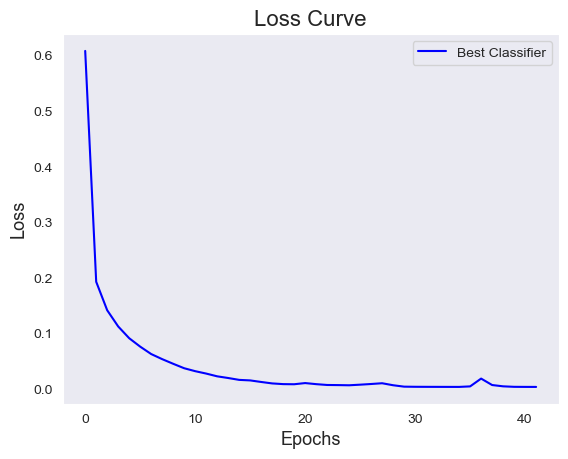

In [107]:
plt.title("Loss Curve", fontsize='16')
plt.plot(best_clf.loss_curve_,color='b', label="Best Classifier")
plt.xlabel("Epochs",fontsize='13')
plt.ylabel("Loss",fontsize='13')
plt.legend(loc='best')
plt.grid()
plt.show()

<h4>Επίδοση του μοντέλου σε άγνωστα δεδομένα</h4>

In [103]:
best_clf_predictions = best_clf.predict(X_test_Normalization)

Text(0.5, 1.0, 'Confusion Matrix')

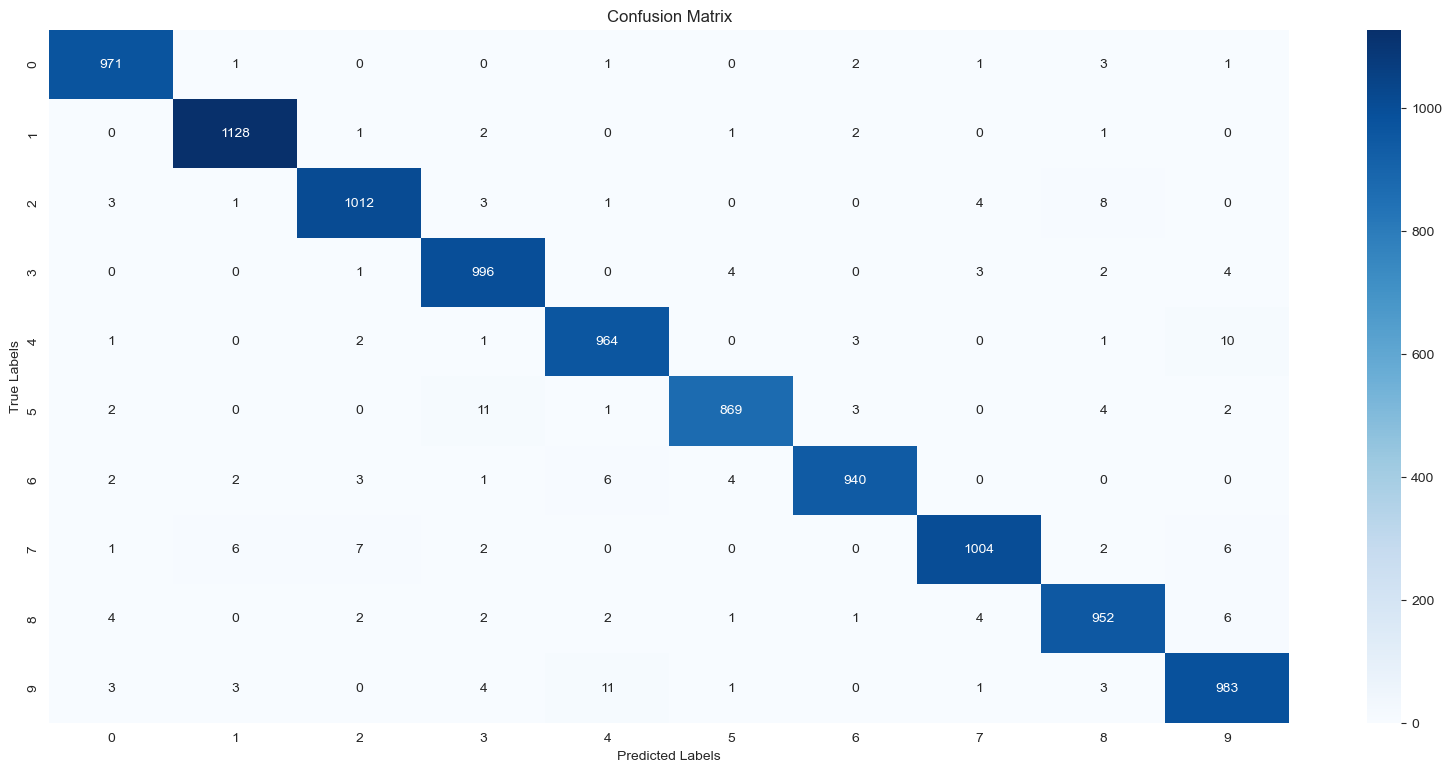

In [104]:
conf_matrix = confusion_matrix(Y_test, best_clf_predictions)
plt.figure(figsize=(20,9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

In [105]:
print("Metrics:")
print("Accuracy: " + str(accuracy_score(Y_test,best_clf_predictions)))
print("F1-Score: " + str(f1_score(Y_test,best_clf_predictions,average='macro')))
print("Precision: " + str(precision_score(Y_test,best_clf_predictions,average='macro')))
print("Recall: " + str(recall_score(Y_test,best_clf_predictions,average='macro')))
print("Log Loss: " + str(log_loss(Y_test,best_clf.predict_proba(X_test_Normalization))))

Metrics:
Accuracy: 0.9819
F1-Score: 0.9817741510788789
Precision: 0.9818983100818276
Recall: 0.9816802198525314
Log Loss: 0.09083739975941307


<h3>Παρατηρήσεις</h3>
<ul>
    <li>Το μοντέλο συγκλίνει αρκετά γρήγορα(χρειάστηκαν 42 εποχές) πετυχαίνοντας σχεδόν μηδενικό loss κατά την διάρκεια της εκπαίδευσης.</li>
    <li>Από τον confusion Matrix, παρατηρούμε ότι κάποια 5 τα μπέρδεψε με 3, κάποια 4 τα μπέρδεψε με 9 (και το ανάποδο). Βέβαια, τα ψηφία αυτά είναι παρόμοια και επομένως είναι λογικό το μοντέλο να "μπερδεύεται"</li>
    <li>Σε άγνωστα δεδομένα παρατηρούμε ότι το μοντέλο πετυχαίνει πάρα πολύ καλές τιμές σε όλες τις μετρικές με τις οποίες το δοκιμάσαμε και συνεπώς έχουμε την πεποίθηση ότι παραδίδουμε ένα καλό μοντέλο στον πελάτη μας.</li>
    <li>Να επισημάνουμε σε αυτό το σημείο ότι δεν είναι σωστό να πούμε ότι τα νευρωνικά δίκτυα είναι πολύ καλύτερα σε σχέση με KNN και Nearest Centroid επειδή με αυτό το μοντέλο πετυχαίνουμε καλύτερες τιμές στα metrics σε σχέση με τις άλλες δύο κατηγορίες μοντέλων, καθώς σε αυτήν την περίπτωση έχει προηγηθεί cross validation για την εύρεση του καλύτερου set από hyper-parameters. Συνεπώς, για να είναι δίκαιη η σύγκριση μεταξύ των τριών θα πρέπει να αφιερώσουμε (περίπου) τον ίδιο χρόνο για το pre-processing των Data και την εκπαίδευση ΚΑΙ στις 3 περιπτώσεις, σε διαφορετική περίπτωση η σύγκριση είναι άνιση.</li>
<ul>

<h2> Committees of Neural Networks (Ensemble Neural Networks)</h2>
<h3>Γνωρίζουμε από την θωρία ότι το σφάλμα J<sup>com</sup> της επιτροπής δικτύων είναι μικρότερο από το μέσο σφάλμα των δικτύων: J<sup>com</sup> &lt; 1/N Σ<sup>N</sup><sub>i=1</sub>J<sub>i</sub>, όπου J<sub>i</sub> τα σφάλματα των Ν δικτύων</h3>
<h3>Στο συγκεριμένο πείραμα, από το cross validation που κάναμε σε προηγούμενο πείραμα δεν θα κρατήσουμε
  μόνο το καλύτερο set από υπερ-παραμέτρους αλλά τα 3 καλύτερα sets. Στην συνέχεια, θα εκπαιδεύσουμε και τα 3 με το ίδιο Data Set αλλά και ένα τέταρτο μοντέλο που θα είναι ένα ensemble Neural Netwrok αποτελούμενο από τα τρία αυτά μοντέλα</h3>

<h4>Κρατάμε τα 3 καλύτερα sets από hyper-parameters</h4>

In [137]:
df = pd.DataFrame(grid_search.cv_results_)
sorted_df = df.sort_values(by=["rank_test_score"]).head(3)
sorted_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_estimator__solver,param_estimator__momentum,param_estimator__max_iter,param_estimator__learning_rate_init,param_estimator__learning_rate,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
23,152.613060,1.539115,0.211945,0.015985,MinMaxScaler(),adam,0.9,300,0.0001,invscaling,...,0.897,0.916,0.910667,0.009741,1,1.0,1.0,1.0,1.0,0.0
26,184.778827,3.161217,0.231624,0.009169,MinMaxScaler(),adam,0.9,800,0.0001,invscaling,...,0.899,0.915,0.904000,0.007789,2,1.0,1.0,1.0,1.0,0.0
17,147.118136,2.669650,0.146863,0.017403,MinMaxScaler(),adam,0.9,600,0.0001,adaptive,...,0.898,0.920,0.900667,0.014817,3,1.0,1.0,1.0,1.0,0.0


In [111]:
# Εκπαίδευση του πρώτου δικτύου (είχε τις καλύτερες επιδόσεις στο cross validation)
first_mlp = MLPClassifier(solver="adam", momentum=0.9, max_iter=300, learning_rate='invscaling', hidden_layer_sizes=(500, 400, 300, 200, 100), early_stopping=False, batch_size=200, alpha=0.001, activation="relu", learning_rate_init=0.0001, random_state=RANDOM_STATE,verbose=True)
first_mlp.fit(X_train_Normalization,Y_train)

Iteration 1, loss = 0.60873623
Iteration 2, loss = 0.19351052
Iteration 3, loss = 0.14228828
Iteration 4, loss = 0.11312158
Iteration 5, loss = 0.09198339
Iteration 6, loss = 0.07683767
Iteration 7, loss = 0.06350906
Iteration 8, loss = 0.05434361
Iteration 9, loss = 0.04599094
Iteration 10, loss = 0.03798179
Iteration 11, loss = 0.03270445
Iteration 12, loss = 0.02839155
Iteration 13, loss = 0.02343397
Iteration 14, loss = 0.02040652
Iteration 15, loss = 0.01704820
Iteration 16, loss = 0.01607984
Iteration 17, loss = 0.01328387
Iteration 18, loss = 0.01067527
Iteration 19, loss = 0.00942074
Iteration 20, loss = 0.00918037
Iteration 21, loss = 0.01130575
Iteration 22, loss = 0.00936044
Iteration 23, loss = 0.00787090
Iteration 24, loss = 0.00766326
Iteration 25, loss = 0.00733370
Iteration 26, loss = 0.00842435
Iteration 27, loss = 0.00963590
Iteration 28, loss = 0.01099173
Iteration 29, loss = 0.00739607
Iteration 30, loss = 0.00485800
Iteration 31, loss = 0.00461032
Iteration 32, los

MLPClassifier(alpha=0.001, batch_size=200,
              hidden_layer_sizes=(500, 400, 300, 200, 100),
              learning_rate='invscaling', learning_rate_init=0.0001,
              max_iter=300, random_state=42, verbose=True)

In [120]:
# Εκπαίδευση του δεύτερου δικτύου (είχε τις δεύτερες καλύτερες επιδόσεις στο cross validation)
second_mlp = MLPClassifier(solver="adam", momentum=0.9, max_iter=800, learning_rate='invscaling', hidden_layer_sizes=(400, 400, 400, 400, 400), early_stopping=False,batch_size=200, alpha=0.0001, activation="relu", learning_rate_init=0.0001, random_state=RANDOM_STATE,verbose=True)
second_mlp.fit(X_train_Normalization,Y_train)

Iteration 1, loss = 0.56507335
Iteration 2, loss = 0.17716214
Iteration 3, loss = 0.12813780
Iteration 4, loss = 0.09734900
Iteration 5, loss = 0.07635524
Iteration 6, loss = 0.06338030
Iteration 7, loss = 0.04980409
Iteration 8, loss = 0.04245343
Iteration 9, loss = 0.03445165
Iteration 10, loss = 0.02717759
Iteration 11, loss = 0.02382920
Iteration 12, loss = 0.01983303
Iteration 13, loss = 0.01473457
Iteration 14, loss = 0.01106761
Iteration 15, loss = 0.01434633
Iteration 16, loss = 0.00832322
Iteration 17, loss = 0.00776485
Iteration 18, loss = 0.00621905
Iteration 19, loss = 0.00371515
Iteration 20, loss = 0.00218822
Iteration 21, loss = 0.00139690
Iteration 22, loss = 0.00106593
Iteration 23, loss = 0.00092507
Iteration 24, loss = 0.00107567
Iteration 25, loss = 0.02111398
Iteration 26, loss = 0.00534293
Iteration 27, loss = 0.00370565
Iteration 28, loss = 0.00364106
Iteration 29, loss = 0.00112935
Iteration 30, loss = 0.00076166
Iteration 31, loss = 0.00069229
Iteration 32, los

MLPClassifier(batch_size=200, hidden_layer_sizes=(400, 400, 400, 400, 400),
              learning_rate='invscaling', learning_rate_init=0.0001,
              max_iter=800, random_state=42, verbose=True)

In [121]:
# Εκπαίδευση του τρίτου δικτύου (είχε τις τρίτες καλύτερες επιδόσεις στο cross validation)
third_mlp = MLPClassifier(solver="adam", momentum=0.9, max_iter=600, learning_rate='adaptive', hidden_layer_sizes=(300, 300, 300, 300, 300), early_stopping=False, batch_size=10000, alpha=0.0001, activation="relu", learning_rate_init=0.0001, random_state=RANDOM_STATE,verbose=True)
third_mlp.fit(X_train_Normalization,Y_train)

Iteration 1, loss = 2.27938069
Iteration 2, loss = 2.19951288
Iteration 3, loss = 2.10657762
Iteration 4, loss = 1.97962265
Iteration 5, loss = 1.80493553
Iteration 6, loss = 1.57570358
Iteration 7, loss = 1.30320069
Iteration 8, loss = 1.02568860
Iteration 9, loss = 0.79384029
Iteration 10, loss = 0.63077216
Iteration 11, loss = 0.52212977
Iteration 12, loss = 0.44898320
Iteration 13, loss = 0.39675770
Iteration 14, loss = 0.35893502
Iteration 15, loss = 0.33027980
Iteration 16, loss = 0.30880238
Iteration 17, loss = 0.29080901
Iteration 18, loss = 0.27585623
Iteration 19, loss = 0.26308592
Iteration 20, loss = 0.25204576
Iteration 21, loss = 0.24148175
Iteration 22, loss = 0.23198049
Iteration 23, loss = 0.22346890
Iteration 24, loss = 0.21540262
Iteration 25, loss = 0.20796565
Iteration 26, loss = 0.20097960
Iteration 27, loss = 0.19450641
Iteration 28, loss = 0.18821788
Iteration 29, loss = 0.18269870
Iteration 30, loss = 0.17697145
Iteration 31, loss = 0.17163053
Iteration 32, los

MLPClassifier(batch_size=10000, hidden_layer_sizes=(300, 300, 300, 300, 300),
              learning_rate='adaptive', learning_rate_init=0.0001, max_iter=600,
              random_state=42, verbose=True)

In [123]:
# Εκπαίδευση του Ensemble Neural Network

# Ορίζουμε τους base estimators
first_mlp_ensemble = MLPClassifier(solver="adam", momentum=0.9, max_iter=300, learning_rate='invscaling', hidden_layer_sizes=(500, 400, 300, 200, 100), early_stopping=False, batch_size=200, alpha=0.001, activation="relu", learning_rate_init=0.0001, random_state=RANDOM_STATE,verbose=True)
second_mlp_ensemble = MLPClassifier(solver="adam", momentum=0.9, max_iter=800, learning_rate='invscaling', hidden_layer_sizes=(400, 400, 400, 400, 400), early_stopping=False,batch_size=200, alpha=0.0001, activation="relu", learning_rate_init=0.0001, random_state=RANDOM_STATE,verbose=True)
third_mlp_ensemble = MLPClassifier(solver="adam", momentum=0.9, max_iter=800, learning_rate='invscaling', hidden_layer_sizes=(400, 400, 400, 400, 400), early_stopping=False,batch_size=200, alpha=0.0001, activation="relu", learning_rate_init=0.0001, random_state=RANDOM_STATE,verbose=True)

# Ορίζουμε το ensemble
ensemble = VotingClassifier(estimators=[('first_mlp', first_mlp_ensemble), ('second_mlp', second_mlp_ensemble), ('third_mlp', third_mlp_ensemble)], voting='soft', n_jobs=-1, verbose=True)
ensemble.fit(X_train_Normalization,Y_train)

VotingClassifier(estimators=[('first_mlp',
                              MLPClassifier(alpha=0.001, batch_size=200,
                                            hidden_layer_sizes=(500, 400, 300,
                                                                200, 100),
                                            learning_rate='invscaling',
                                            learning_rate_init=0.0001,
                                            max_iter=300, random_state=42,
                                            verbose=True)),
                             ('second_mlp',
                              MLPClassifier(batch_size=200,
                                            hidden_layer_sizes=(400, 400, 400,
                                                                400, 400),
                                            learning_rate='invscaling',
                                            learning_rate_init=0.0001,
                                            max_ite

In [126]:
first_mlp_predictions = first_mlp.predict(X_test_Normalization)
second_mlp_predictions = second_mlp.predict(X_test_Normalization)
third_mlp_predictions = third_mlp.predict(X_test_Normalization)
ensemble_mlp_predictions = ensemble.predict(X_test_Normalization)

Text(0.5, 1.0, 'Confusion Matrix')

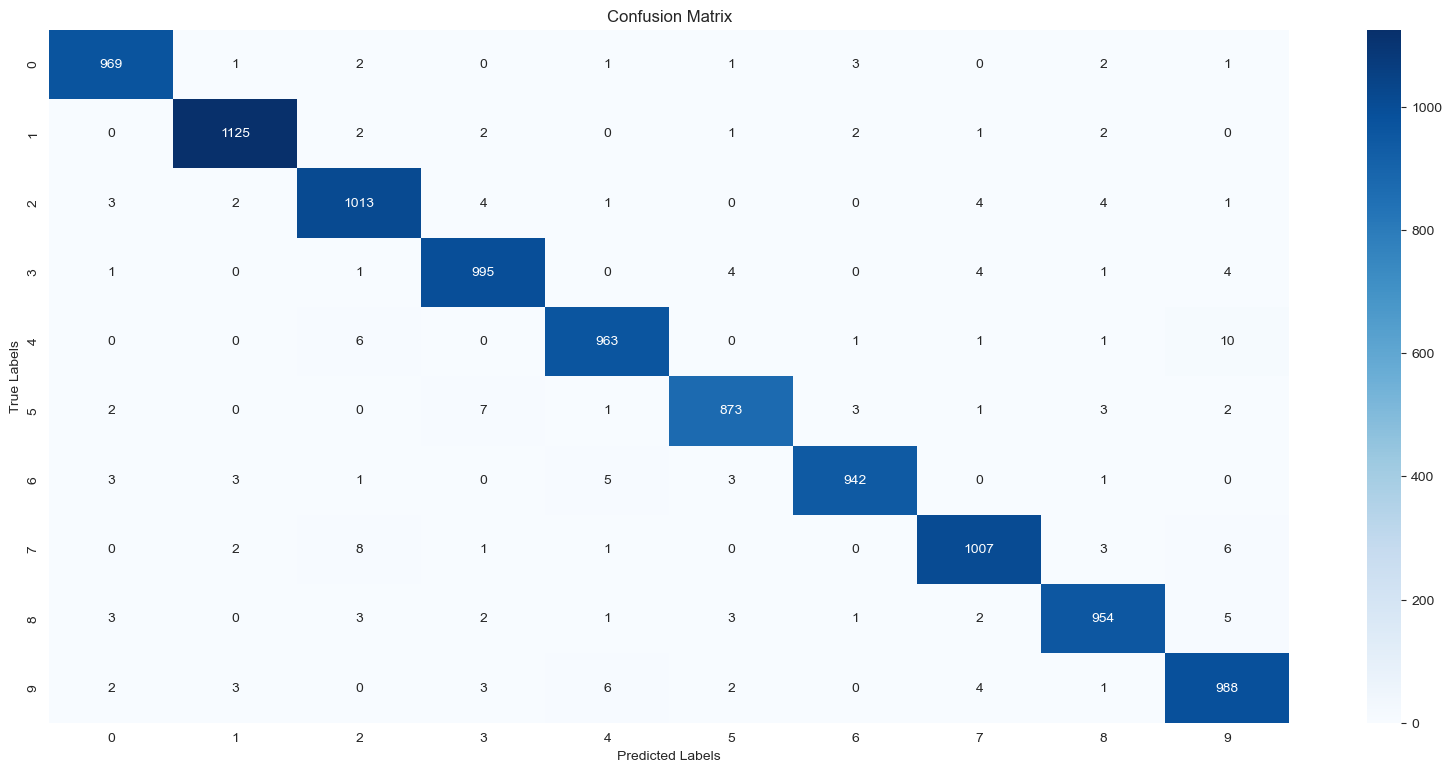

In [127]:
conf_matrix = confusion_matrix(Y_test, ensemble_mlp_predictions)
plt.figure(figsize=(20,9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

In [128]:
print("Accuracy in each case:")
print(f"First MLP: {accuracy_score(Y_test,first_mlp_predictions)}")
print(f"Second MLP: {accuracy_score(Y_test,second_mlp_predictions)}")
print(f"Third MLP: {accuracy_score(Y_test,third_mlp_predictions)}")
print(f"Committees of networks: {accuracy_score(Y_test,ensemble_mlp_predictions)}")

Accuracy in each case:
First MLP: 0.9819
Second MLP: 0.9825
Third MLP: 0.9777
Committees of networks: 0.9829


In [129]:
first_mlp_predictions_probabilities = first_mlp.predict_proba(X_test_Normalization)
second_mlp_predictions_probabilities = second_mlp.predict_proba(X_test_Normalization)
third_mlp_predictions_probabilities = third_mlp.predict_proba(X_test_Normalization)
ensemble_mlp_predictions_probabilities = ensemble.predict_proba(X_test_Normalization)

In [135]:
print("Log Loss in each case:")
j_1 = log_loss(Y_test,first_mlp_predictions_probabilities)
j_2 = log_loss(Y_test,second_mlp_predictions_probabilities)
j_3 = log_loss(Y_test,third_mlp_predictions_probabilities)
j_committees = log_loss(Y_test,ensemble_mlp_predictions_probabilities)
j_average = np.average([j_1,j_2,j_3])
print(f"First MLP: {j_1}")
print(f"Second MLP: {j_2}")
print(f"Third MLP: {j_3}")
print(f"Committees of networks: {j_committees}")
print(f"Επαληθεύεται αυτό που μας λέει η θεωρία; Απάντηση:{j_committees < j_average} (Αφού: j_committees: {j_committees} και j_average: {j_average})")

Log Loss in each case:
First MLP: 0.09083739975941307
Second MLP: 0.1087304892295298
Third MLP: 0.09115252928666304
Committees of networks: 0.07522199352631015
Επαληθεύεται αυτό που μας λέει η θεωρία; Απάντηση:True (Αφού: j_committees: 0.07522199352631015 και j_average: 0.09690680609186864)


<h3>Παρατηρήσεις</h3>
<ul>
    <li>Από τον confusion Matrix, παρατηρούμε ότι το ensemble μπερδεύεται σε κάποια ψηφία που μοιάζουν (π.χ. 4-9, 2-7, 3-5)</li>
    <li>Το committees of networks πετυχαίνει καλύτερο accuracy στα άγνωστα δεδομένα σε σχέση με τους τρεις base estimators. Συνεπώς, παρατηρούμε ότι ένα σύνολο από Νευρωνικά Δίκτυα καταφέρνει να πετύχει μεγαλύτερη ορθότητα σε σχέση με ένα μεμονωμένο Νευρωνικό Δίκτυο.</li>
    <li>Τέλος, στο συγκεκριμένο πείραμα επιβεβαιώσαμε και αυτό που μας έχει πει η θεωρία, ότι δηλαδή το σφάλμα J<sup>com</sup> της επιτροπής δικτύων είναι μικρότερο από το μέσο σφάλμα των μεμονωμένων δικτύων</li>
</ul>